## Word-embeddings for similar term detection and synonym expansion 

In [1]:
# This code is based on: 
# Mahmoud El-Haj's visualization tutorial for Machine Learning and NLP
# Jeff Delaney at Kaggle (kaggle.com/jeffd23):  https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
# Many thanks to Mahmoud and Jeff 

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Word2Vec model
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [4]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('teal')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
        
    # Reduces the dimensionality from 100 to 11 dimensions with PCA
    reduc = PCA(n_components=10, ).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # background color
    ax = plt.axes()
    ax.set_facecolor('ghostwhite')
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    # Hide grid
    plt.grid(False)
    #plt.savefig(pltFileName)

## Test with embeddings trained on COVID-19 corpus

In [5]:
from gensim.models.wrappers import FastText
model2 = FastText.load_fasttext_format('fasttext-covid19-embeddings/covid-19-embeddings-es-d100-min5-uncased.bin')

In [6]:
wv_word = "favipiravir"
model2.most_similar(wv_word)

[('avifavir', 0.8190910220146179),
 ('maraviroc', 0.8054166436195374),
 ('darunavir', 0.769184947013855),
 ('lopinavir', 0.7591572999954224),
 ('ribavirina', 0.7528921961784363),
 ('lopinavir-ritonavir', 0.7527613043785095),
 ('baricitinib', 0.7462754845619202),
 ('colchicine', 0.7396938800811768),
 ('remdesevir', 0.7393302917480469),
 ('oseltamivir', 0.7388783693313599)]

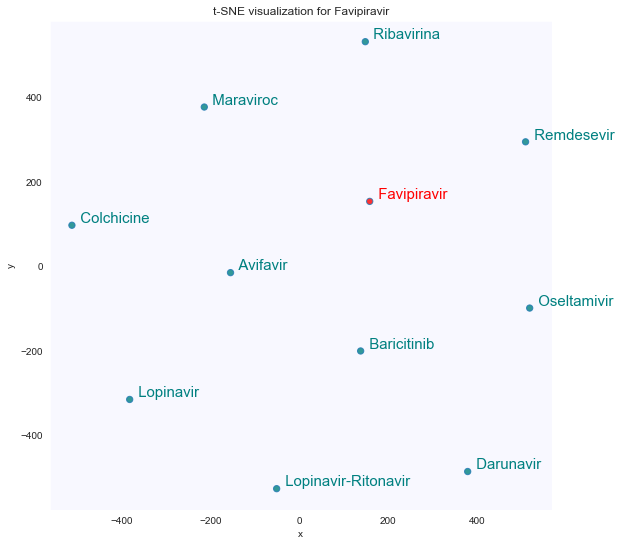

In [7]:
tsnescatterplot(model2, wv_word, [i[0] for i in model2.wv.most_similar(wv_word)]) 

In [8]:
wv_word = "opaganib"
model2.most_similar(wv_word)

[('propaganda', 0.7785313129425049),
 ('propagan', 0.6988972425460815),
 ('propagando', 0.6870874166488647),
 ('copago', 0.66051185131073),
 ('rusos', 0.6488878130912781),
 ('mugeju', 0.640055775642395),
 ('copa', 0.6387958526611328),
 ('popayán', 0.6376399397850037),
 ('#sánchezveteya', 0.6343621611595154),
 ('rumor', 0.6332772970199585)]

In [9]:
wv_word = "colchicina"
model2.most_similar(wv_word)

[('colchicine', 0.8328693509101868),
 ('ruxolitinib', 0.7914982438087463),
 ('antipalúdico', 0.788130521774292),
 ('pirfenidona', 0.7871890664100647),
 ('colchón', 0.7784891724586487),
 ('doxiciclina', 0.7716015577316284),
 ('abx464', 0.7595564126968384),
 ('tofacitinib', 0.7592284679412842),
 ('dfv890', 0.7590133547782898),
 ('m04ac01', 0.7574728727340698)]

In [10]:
wv_word = "remdesivir"
model2.most_similar(wv_word)

[('remdesevir', 0.8997074961662292),
 ('veklury', 0.7676551938056946),
 ('veklury®', 0.7331488132476807),
 ('antiviral', 0.7199548482894897),
 ('acalabrutinib', 0.7145290970802307),
 ('oseltamivir', 0.7143322825431824),
 ('baricitinib', 0.6989405751228333),
 ('darunavir', 0.6949024796485901),
 ('tofacitinib', 0.6929934620857239),
 ('fármaco', 0.6774528622627258)]

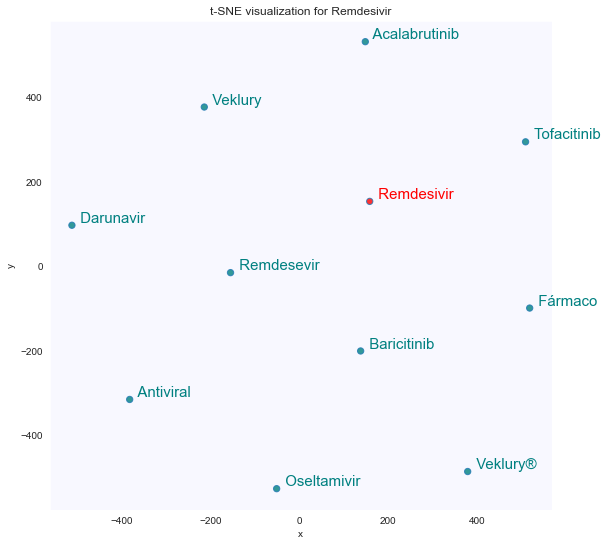

In [11]:
# Note in the scatterplot: Veklury is the brand name of remdesivir
tsnescatterplot(model2, wv_word, [i[0] for i in model2.wv.most_similar(wv_word)]) 

In [12]:
wv_word = "plitidepsina"
model2.most_similar(wv_word)

[('oatp1b3', 0.7323133945465088),
 ('eef1a', 0.729608952999115),
 ('melatonina', 0.7226555347442627),
 ('acalabrutinib', 0.7125130891799927),
 ('proteasa', 0.7097486257553101),
 ('profármaco', 0.7081688642501831),
 ('antiviral', 0.7076476812362671),
 ('fármaco', 0.7059628963470459),
 ('hcr040', 0.7054573893547058),
 ('2c9', 0.7044268250465393)]

### TSNE of the most frequent terms in the COVID-19 corpus

In [13]:
%%capture
#Plotting similarities of a word embedding model using a scatter plot from t-SNE
#(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.
def tsne_plot(model,modelName):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    pltFileName = 'plots'+'/'+'word_embeddings'+'_'+modelName+'.pdf';
    plt.savefig(pltFileName)
    plt.show()

In [14]:
from gensim import utils
from gensim.corpora.dictionary import Dictionary

In [15]:
# Compute the term frequencies
# load corpus text data
TEXT_DATA_DIR = "../../COVID19/corpus/all-for-training/covid-19-corpus-24042021.tok"

# Concatenate all sentences into a single list 
# Each sentence must be a list of string tokens:
all_sentences = []
with open(TEXT_DATA_DIR, 'r', encoding='utf-8') as f:
    Lines = f.readlines()
    for line in Lines:
        line = line.strip()
        Tokens = line.split()
        all_sentences.append(Tokens)

In [16]:
# Flat the list of list of sentences to one list of tokens
# If sentences are preserved, frequencies are counted per sentence (not in the whole corpus)
all_tokens = [item for sublist in all_sentences for item in sublist]
print(all_tokens[0:10])
print(type(all_tokens))
print(len(all_tokens))

['2020', ',', 'un', 'año', 'a', 'la', 'caza', 'del', 'coronavirus', 'sars-cov-2']
<class 'list'>
7017450


In [17]:
# Remove stopwords, numbers, toponyms and punctuation
# List of stop words to detect in multiword terms
Stopwords = []
with open('stopwords_es.txt', 'r', encoding='utf-8') as f:
    Lines = f.readlines()
    for line in Lines:
        line = line.strip()
        Stopwords.append(line)

Punct = [',', '.', "'", '!', '!', '¿', '?', '=', ';', ':', '-', '+', '*', '', '"', '(', ')', '[', ']', '%', '/']

all_tokens_cleaned = []
for token in all_tokens:
    if (token not in Stopwords) and (token not in Punct) and not (token.isnumeric()):
        all_tokens_cleaned.append(token)

In [18]:
# Dictionary of corpus terms (use list: [])
dct = Dictionary([all_tokens_cleaned])

In [19]:
# Convert tokens into the bag-of-words (BoW) format; then, get frequencies
Data = dct.doc2bow(all_tokens_cleaned)

In [20]:
# Map dictionary ids to frequencies
for i in dct:
    print(dct[i],Data[i][1])

 1
a 1
concederán 1
de 1
del 3
en 1
jefa 1
obesidad 1
y 1
aporta 1
con 1
!! 83
!!#portada 1
!!el 1
!!en 1
!!enhorabuena 1
!!mi 1
!!pedro 1
!!saturación 1
!!y 1
!!️ 13
!!️para 1
!!️ruego 1
!!️tal 1
!!👌 1
!!📸 1
!!📽 1
!#cacerolada21hhola 1
!#chicasvox® 1
!#covid19 1
!#covid19▶ 1
!#economía_y_negocios 1
!' 1
!- 1
!12 1
!34 1
!4 1
!9 1
!? 2
!a 2
!adivinen 1
!alerta 1
!cual 1
!cuidado 1
!diuuuuu 1
!dos 1
!ea 1
!el 2
!errores 1
!feliz 1
!guardia 1
!he 1
!la 2
!logramos 1
!los 2
!manténganse 2
!me 1
!no 1
!todos 1
!una 1
!¡ 2
!éste 1
!▶️sanidad 1
!► 2
!☀️ 1
!♻️la 1
!️ 5
!️en 1
!️este 1
!️gracias 1
!️necesitamos 1
!️no 1
!️reapertura 1
!️seréis 1
!️somos 1
!🍊 1
!👇muy 1
!👇🏾 1
!👊¿ 1
!👏 1
!👏👏 1
!💙 1
!💪 1
!📣el 1
!🔁sigue 1
!🗣️he 1
# 33
### 80
#-ic#- 1
#0 1
#062 1
#1 6
#10abrilcacerolada21h 1
#11003407 1
#11ago 1
#11odía 1
#12horasbizkaiagc1- 1
#12j 1
#12julio 1
#12mayun 1
#14demayo 1
#15junno 1
#17añosbarrioadentro 2
#18abr| 1
#19may 1
#1abr 1
#1añodelcierre 1
#1demayo 1
#2 4
#20abrilcace

#recomiendoleer 3
#reconstrucciónverde 1
#recuerdosinolvidables 3
#redapoyosolidario 1
#redessociales 1
#redondela 1
#referendumya 1
#reflexión 1
#reformas 1
#reframecovid 2
#refugio 1
#regiondemurcia 1
#regióndemurcia 5
#regularizacionya 2
#rehabilitacion 1
#rehabilitaciónyfisioterapia 1
#reimaginar 1
#reimagine 3
#reinventa_ 1
#reinventaelsistema 1
#reinventaelsistema.cuando 1
#renfedespide 1
#reportaje 1
#reportero 1
#resceu 2
#resguardofamiliar 1
#residencias 1
#residuoscero 1
#resistemadrid 1
#resistenciademocrática 1
#resistire 2
#responsabilidad 2
#restaurantes 2
#reto7 1
#retolibro 1
#reunionesfamiliaresa 1
#revolucionpolitica 1
#right2cure 1
#rinconesconencanto 1
#rinconfavoritolpgc 1
#rithmi 1
#rmfansencasa 1
#rne 1
#robe 1
#robeiniesta 1
#robots 1
#rota 1
#rrhh 1
#rrss 1
#rtve 1
#rugby 1
#sadenlucha 1
#saldremosjuntosprevenir 1
#salimosmásfuertes 3
#salimostodasjuntas 1
#salteras 1
#salud 5
#saludmadrid 1
#saludmental 1
#saludsinbulos 1
#salvaragenciasviajes 1
#sanblas 1
#sa

1.11 1
1.111 1
1.112 1
1.112.982 1
1.113 1
1.114 3
1.117.348 1
1.117.404 1
1.118 2
1.118.429 3
1.12% 1
1.120 4
1.121 1
1.122 1
1.122.501$ 1
1.122.866 1
1.123 2
1.125 2
1.126 1
1.126.337 1
1.127 1
1.128 1
1.129 1
1.13 1
1.130 1
1.131 2
1.131.340 1
1.131.805 3
1.132.694 1
1.135 1
1.138 1
1.139.400 2
1.139.874 1
1.140 3
1.140.000 1
1.141 4
1.142 1
1.142.815 1
1.143.300 1
1.143.573 2
1.146 2
1.146.196 1
1.147 2
1.147.629 1
1.148 1
1.149.224 1
1.150 2
1.150.000 1
1.155.018 1
1.160 1
1.161 3
1.162 1
1.17 1
1.172.710 1
1.174 1
1.175 1
1.176.896 2
1.177 3
1.178 1
1.18 2
1.181.136 1
1.188 1
1.19 2
1.191 1
1.192.644 1
1.193 1
1.193.588 1
1.196 2
1.197 1
1.198.054 1
1.2 4
1.2.2021 2
1.2.5033 1
1.200 31
1.200.000 6
1.204 1
1.205 1
1.208.341 1
1.210.914 1
1.212.261 2
1.215 1
1.216 1
1.219.238 1
1.22 1
1.22-2.60 1
1.221 2
1.222 1
1.224.005 1
1.227 5
1.228.114 1
1.228.374 1
1.23 2
1.230 1
1.233.116 1
1.238 1
1.239 2
1.24 1
1.240 1
1.241 1
1.241.370 5
1.243 1
1.243.783 4
1.245 1
1.246 1
1.246.971 1
1.

199.631 3
199.900 1
1990-2018 1
1992ng 1
1993-2006 1
1997-1999 1
1998-2002 1
1999-2000 1
1999-2016 1
199x109 1
19b 5
19h 2
19h00 2
19may' 1
19mm 1
19s 1
19treatmentguidance 1
19ª 3
19º 2
19є 1
1<25% 1
1a 20
1a-b 1
1a. 1
1a2 1
1a3 2
1a4 2
1a6 2
1a9 2
1abr' 12
1b 35
1b1 6
1b3 4
1beta 1
1c 13
1cm 4
1cwte1fkqn 1
1d 5
1day 1
1e 3
1er 10
1era 1
1estas 1
1g 1
1generación 1
1l32 1
1m 2
1mg 2
1mill 1
1mm 3
1muestra 1
1o 2
1p 2
1persona 1
1s2019 1
1s2020 1
1st 2
1x10-1 1
1x10-7 3
1x10-8 5
1x10-9 1
1x1011 1
1y 1
1|x 2
1ª 50
1ª-2ª 1
1° 9
1°- 1
1º 13
1¿ 1
1ó 2
1̊ 1
1є 2
1‑2 2
1‑diil 2
1⃣ 2
1⃣adulto 1
1⃣hora 1
1⃣junta 1
1⃣km 1
1⃣vez 1
1️⃣ 3
1️⃣1️⃣2️⃣ 1
1️⃣9️⃣ 1
1️⃣arruinan 1
1️⃣kg 1
2% 444
2%-82 2
2%3 1
2%de 1
2%® 1
2' 5
2+2 1
2- 30
2-0 4
2-04-2020 2
2-1 2
2-1-1 2
2-10 1
2-10% 2
2-10-19 1
2-11 1
2-11% 1
2-12 5
2-14 3
2-15 2
2-16 1
2-19 2
2-2 2
2-21 1
2-23 1
2-3 67
2-3% 3
2-3cm 2
2-3mm 1
2-4 16
2-4-20 4
2-4-2020 7
2-44 1
2-5 15
2-50 1
2-6 2
2-7 4
2-71 1
2-73 1
2-76 1
2-8 13
2-8°c 1
2-8ºc 15
2-9 1
2-9

2arias 1
2b 29
2b6 3
2b7 2
2baja 1
2c 6
2c19 4
2c8 4
2c9 6
2cc 1
2ce1 1
2cm 8
2d 24
2d3 1
2d6 7
2da 1
2e 1
2euros 2
2irsijdf6j 1
2j0siml3e9 1
2l 2
2m 6
2mg 1
2mts 1
2muy 1
2nd 4
2new 1
2o 2
2o3 1
2p 40
2ppm 1
2presenta 1
2pruebas 1
2r 2
2rio 2
2tuvieron 1
2v 3
2x1 1
2x10 2
2x101⁷ 1
2x1cm 1
2x2 2
2x2cm 1
2x4a37s 2
2zy 1
2ª 44
2° 10
2°- 2
2°-8° 1
2°c 22
2°eso 1
2º 32
2º-5º 2
2ºc 33
2ºc-8ºc 2
2‑ 2
2‑diestearoil‑sn‑glicero‑3‑fosfocolina 2
2‑hexildecanoato 2
2— 1
2⃣ 1
2⃣inditex 1
2℃ 1
2️⃣ 3
2️⃣0️⃣2️⃣1️⃣ 1
2️⃣cada 1
2️⃣desmotivan 1
3% 476
3%- 1
3%.un 1
3%14 1
3%2 1
3' 4
3+7 1
3- 22
3-0 8
3-10% 1
3-10-13 1
3-100 1
3-11 1
3-12 2
3-12% 1
3-157 1
3-16 1
3-18 1
3-19 3
3-2 1
3-24% 1
3-26 1
3-3 2
3-3-20 1
3-35 1
3-4 50
3-4% 1
3-4-20 6
3-4-2020 3
3-5 22
3-5-18 1
3-6 11
3-61 1
3-64 1
3-7 9
3-72 1
3-74 1
3-75 1
3-8 5
3-9 1
3-91 2
3-93 1
3-97 1
3-b 2
3-c 2
3-cycle 1
3-d 3
3-tran 1
3-veces 1
3.- 9
3..2.. 1
3.0 3
3.000 91
3.000.000.000 1
3.004 1
3.010 1
3.012.000 1
3.015 1
3.016 1
3.018.681 1
3.020.450 1

50.000m 1
50.122 2
50.127 1
50.252 1
50.340 1
50.400 1
50.85 1
50.967 1
500% 1
500- 1
500.000 56
500.000euros 1
500.486 1
50058-100-08 1
50066-605-08 1
500mg-1g 1
501.v2 1
501y 1
501y.v1 2
501y.v2 18
501y.v3 2
50302-003-00 1
50302-003-11 1
50302-003-60 1
50302-013-10 1
50302-013-60 1
50302-020-50 1
50302-021-50 1
504.000 2
505-508 1
505.429 1
505g 1
506.574 1
507-13 1
507-284 1
507-284-5005 41
507.276 1
507.829 1
508.010 1
509-17 1
509-513 1
50927105298.jpg 1
50bpm 1
50cm 1
50g 1
50mg 1
50ml 1
50s 2
50x22 4
51% 18
51%-100% 2
51-64 1
51-75% 3
51-9 1
51.000 5
51.2% 2
51.200 1
51.271 1
51.367.983 1
51.373 1
51.409 3
51.418 1
51.500 2
51.675 1
51.958 1
51.993 1
512.793 1
513.393 2
51384-001-01 1
51384-001-02 1
51384-002-01 1
51384-003-01 1
51384-003-02 1
51384-004-01 1
51384-500-10 1
51384-500-11 1
51384-500-23 1
51384-500-47 1
51384-500-94 1
514-23 1
514.489 1
5142.boletín 1
5155-6041 1
517.500 1
518.727 1
519-28 1
52% 27
52-2 1
52-46 1
52-72 1
52.000 17
52.030 1
52.139 1
52.165 1
52.300 

8.324.294 1
8.340 2
8.348.979 2
8.374 1
8.377 1
8.4 1
8.4.1 1
8.4.2020 1
8.400 2
8.405 1
8.439 1
8.444 1
8.468.999 2
8.475.825 1
8.5 3
8.5.2020 3
8.500 6
8.515.767 1
8.517.446 2
8.578 1
8.581 1
8.582.722 1
8.6 2
8.6.2020 1
8.600 1
8.638 2
8.640 1
8.648 1
8.649 1
8.658 1
8.720 1
8.721 1
8.726.719 1
8.737 2
8.744 1
8.777 1
8.780 1
8.800 1
8.802 1
8.804 1
8.826 3
8.847 1
8.866 1
8.9 1
8.900 1
8.932 1
8.952.299 1
8.959 1
8.964 1
8.984.225 1
8.b 2
8.o 1
80% 214
80%- 1
80- 1
80-1 1
80-100 1
80-100% 4
80-120 1
80-155 1
80-16 1
80-160 1
80-6 1
80-84 3
80-85 1
80-89 2
80-9 1
80-90 2
80-90% 3
80-98% 1
80.000 18
80.110 1
80.304 2
80.342 1
80.58% 1
80.587 1
80.700 1
80.74 2
80.756 1
80.801 1
80.932 1
80.942 1
800- 1
800-1000 1
800-1200 1
800-222-1222 2
800-446-2279 1
800-953-5234 1
800.000 23
800.049 1
800m2 2
800mg 1
801.791 1
802.067 1
805.492 1
808-526-1708 2
808.600 2
809-815 1
80s 1
80℃ 1
81% 33
81-0 1
81-151 1
81-5 1
81-98% 1
81.000 4
81.000m 1
81.144 2
81.191 1
81.201 1
81.279 1
81.294 1
81

@ilvolo 1
@imib_arrixaca 1
@inaltech.sl 1
@inesarrimadas 3
@info_tello 2
@infouex 1
@ingavonkafer 1
@innovahuci 1
@intecnica 1
@inter_es 1
@interalmeriatv 1
@interiorgob 4
@investenisciii 1
@iratietxarri8 1
@irenemontero 4
@irenerr32 1
@irenirima 1
@iriagal 1
@isabeljsanz 1
@isaserras 1
@isbylexa 1
@isidropr 1
@isokatops 1
@isthar6680 1
@itaca_grupo 1
@ivan_cobos 1
@ivan_s_f 2
@ivancancelarod1 1
@ivancepedacast 1
@jacoboparages 1
@jaime_castrog 1
@jalmagro 1
@janezlenarcic 1
@japortalmiranda 1
@jarios_autor 1
@jaumeasens 2
@javier_fraiz 1
@javierimbroda 1
@javiermartinr1 1
@javiernegre10 1
@javierpadillab 1
@javierpinacruz 2
@javiersolana 1
@javihagen 1
@jazarzalejosme 1
@jazzmadridclub 1
@jcbonillaperez 1
@jcoscu 1
@jeffbezos 1
@jessicaquerom 1
@jesusarroyod 1
@jesusraguirre 4
@jesusteniente 1
@jiechaniz 1
@jimmyvillasan 1
@jlarasti 1
@jlgilsoto 1
@jlmontesino 1
@jlo 1
@jlsteeg 2
@jmanuelcarrion 2
@jmanuelisbylex 1
@jmfarfanperez 1
@jmgbautista 1
@jmmulet 1
@jnavidadc 1
@joanmiquelmj 

activ-4c 1
activ-5 2
activ4bllame 1
activa 585
activa' 1
activaban 1
activaciones 3
activación 273
activada 24
activadas 9
activado 46
activador 6
activadora 1
activadores 1
activados 9
activamente 67
activamos 9
activan 35
activando 20
activar 99
activara 1
activaran 1
activaremos 1
activarlas 1
activarlo 1
activaron 5
activarse 12
activará 18
activarán 4
activaría 2
activarían 4
activas 68
activated 1
activation 5
active 12
actively 1
activen 4
actividad 1890
actividad- 1
actividad-ejercicio 1
actividad3 1
actividades 1278
actividades.‎ 1
activismo 6
activista 10
activistas 11
activities 5
activity 17
activo 403
activos 262
activos1 1
activó 1
activó 16
acto 151
actor 40
actores 98
actors 1
actos 67
actos...promueven 1
actos® 2
actrims 1
actriz 13
acts 13
actt 1
actt-1 28
actt-2 2
actt-4 1
actuaba 2
actuaban 2
actuaciones 291
actuación 416
actuación.. 1
actuación^ 1
actuad 1
actuado 34
actuaidad 1
actual 2407
actual- 1
actual.​ 1
actual13 1
actual48 1
actual6 1
actuales 500
actuales

alad 1
alain 1
alajuela 8
alajuelita 2
alaklobi 1
alalpardo 1
alamance 2
alambicada 1
alambre 7
alambres 5
alamdari 2
alameda 3
alamneh 1
alamy 1
alan 3
alania 1
alanina 32
alanina-aminotransferasa 1
alanina-transaminasa 1
alanino 5
alantra 5
alarcon 1
alarcán 1
alarcó 18
alarcón 24
alarcón- 1
alardeó 1
alarga 9
alargada 3
alargadas 1
alargado 5
alargados 2
alargamiento 12
alargan 5
alargar 23
alargarse 4
alargue 5
alargándose 1
alargó 1
alarm 1
alarma 2303
alarma- 1
alarma.y 1
alarmada 1
alarmado 3
alarmados 3
alarmamos 1
alarmando 1
alarmante 54
alarmantemente 2
alarmantes 31
alarmar 6
alarmaron 1
alarmarse 5
alarmas 31
alarma👨‍🦳👩‍🦳los 1
alarme 1
alarmina 1
alarminas 2
alarmismo 5
alarmismos 2
alarmista 8
alarmistas 10
alarmó 1
alas 7
alaska 12
alastair 1
alat 1
alba 51
alba-tcp 1
albacete 27
albacetense 1
albaceteña 1
albacovid 2
albalate 1
albanesa 1
albaneses 4
albania 36
albania<> 1
albany 1
albanés 1
albarcas 1
albareda 1
albarrán 1
albedrío 1
albek 13
alberga 24
albergada 1
alb

anexectomía 4
anexial 5
anexo 228
anexos 10
anfetamina 2
anfetaminas 1
anfibios 1
anfield 1
anfitrionas 7
anfitriones 5
anfitrión 5
anfractuosa 1
ang 61
ang-2 2
ang1-7 3
ang2 1
angel 2
angel24 1
angela 14
angeles 1
angelillo-scherrer 1
angelini 7
angelismo 1
angelo 2
anger 1
angi 1
angii 10
angina 14
anginas 1
anginosas 1
anginosus 1
angio 12
angio- 1
angio--tc 1
angio-rm 1
angio-tac 6
angio-tc 70
angio-tco 1
angiocéntricas 1
angioedema 17
angiogenesis 2
angiografía 37
angiografías 4
angiograma 1
angiography 1
angiográfica 2
angiográficas 3
angiográficos 2
angiogénesis 4
angiogénicos 1
angiology 2
angiología 10
angiomatoide 1
angiomatoso 1
angiomiolipoma 5
angiomiolipomas 1
angioplasta 1
angioplastia 6
angioplastias 1
angiopoyetina-2 1
angiorresonancia 1
angiotac 3
angiotc 38
angiotensin 25
angiotensin- 1
angiotensin-converting 7
angiotensin-receptor 1
angiotensina 236
angiotensina- 10
angiotensina-2 7
angiotensinógeno 3
angiotomografía 6
anglemyer 1
anglia 3
anglicismo 1
anglicismos 1

apuntaron 10
apuntarse 3
apuntará 1
apunte 3
apunten 4
apunto 1
apuntó 126
apuran 1
apure 1
apuros 5
apuñalaron 1
apuñalas 1
apxt 1
apxtxcc 2
apátrida 1
apéndice 62
apéndices 3
apócrifa 1
apócrifas 1
apófisis 3
apósito 6
apósitos 6
apóyela 1
apúntalo 2
apúntate 4
aq 1
aqr 1
aquarium 1
aquas 3
aquaticus 1
aqueja 4
aquejado 3
aquejados 3
aquejar 1
aquel 105
aquelarre 1
aquella 82
aquellas 584
aquello 62
aquellos 1477
aqueous 1
aqui 5
aquila 1
aquiles 7
aquilion 2
aquilitadas 1
aqunque 1
aquél 2
aquéllas 1
aquéllos 5
aquí 672
aquí.. 1
aquí.nueva 1
aquí▶️ 1
aquí➡️ 1
ar 28
ar-glp1 1
ar1 1
ara 55
ara- 1
ara-ii 40
ara-ii19 1
ara2 23
araba 4
araba-santiago 1
arabela 1
arabi 4
arabia 40
araceli 12
aracil 1
aracnoides 1
aragon 2
aragonesa 3
aragonesas 1
aragoneses 1
aragonesista 1
aragonès 1
aragonés 12
aragón 148
araid 2
araii 37
aralen 2
aramburu 1
aramideh 2
aran 4
arana-puerta 1
aranatz 1
aranaz 4
aranceles 1
arancha 3
arancibia 1
aranda 6
aranda-valderrama 2
arando 1
arango 31
aranguren 7
a

atómicos 6
atónito 2
atópica 3
atún 5
au 2
aubin 1
auc 36
auc0-8 1
auc0-time 1
aucinf 1
auckland 1
aucultación 1
audaces 6
audacia 1
audaz 2
audibles 2
audición 17
audiencia 21
audiencia' 1
audiencias 5
audio 72
audioconferencia 2
audioguía 1
audiolibros 1
audiología 2
audiometría 4
audios 17
audioserie 11
audiovisual 24
audiovisuales 20
audit 2
auditables 1
auditados 2
auditando 2
auditar 2
audite 1
auditiva 6
auditivas 7
auditivos 4
auditores 2
auditoria 3
auditorias 6
auditorio 4
auditorios 6
auditoría 30
auditorías 14
audra 1
audrey 8
audímetros 2
auemento 1
auemnto 2
aug 42
aug-sep 1
auge 31
augesia 2
augmentine 3
augsburger 1
augura 13
auguraba 3
auguraban 2
augurado 2
auguran 7
augurar 3
augures 1
augurio 3
augurios 1
auguró 1
august 22
augusti 1
augusto 12
augustovski 1
aula 49
aulas 111
aulnay-sous-bois 1
aumeentad 1
aumenado 1
aumendo 1
aumenta 537
aumenta.. 2
aumentaba 10
aumentaban 10
aumentada 64
aumentadas 13
aumentado 391
aumentados 18
aumentamos 2
aumentan 205
aumentand

bastoni 1
bastón 2
basura 126
basura.^2 1
basurero 1
basurto 1
basándonos 31
basándose 126
basíca 1
basícos 1
basílica 4
basó 39
basófilas 1
basófilos 2
bat 3
bat-cov 1
bata 114
bata* 1
bata^ 1
bataclan 1
batalla 91
batalla.cataluña 1
batallan 3
batallando 3
batallar 1
batallas 5
batallitas 1
batallones 1
batas 195
batas10.000 1
bata‐muñeca 1
batcov 1
batcovratg13 1
batea 2
batear 1
batería 28
baterías 7
bates 6
batet 8
bath 6
bathaeian 1
batiburrillo 1
batido 3
batir 2
batisse 1
batió 1
batlle 1
batllori 1
batman 4
batsis 1
battambang 2
battegay 1
battelle 3
baud 2
baudette 1
bauer 2
bauman 2
baumannii 12
baumbach 1
baumeister 1
bautismo 1
bautismos 1
bautiza 1
bautizada 2
bautizadas 1
bautizado 6
bautizaron 1
bautizos 1
bautizándolo 1
bautizó 5
bauzá 6
bavari 1
bavarian 1
baveno 1
baviera 3
baw 1
bawazeer 2
bax 1
bay 2
baya 1
bayamón 1
bayas 2
bayer 29
bayesian 1
bayesiana 3
bayesiano 7
bayesianos 2
bayeta 5
bayetas 3
baylina 1
baylor 8
bayona 1
baza 4
bazaga 2
bazalgette 1
bazar 1
b

brasilera 9
brasilero 9
brasilerol 1
brasileros 1
brasileña 49
brasileñas 7
brasileño 18
brasileños 30
brasileños' 1
brasilia 5
brasiluruguay.jpg 1
brassey 2
brataj 2
bratislava 1
braun 2
braunschweig 1
braunwald' 1
brava 1
brave 1
bravo 15
bravío 1
brazalete 3
brazett 1
brazil 4
brazil' 1
brazilian 1
brazo 158
brazos 113
brazos- 1
brca 1
brcss 2
breakbone 1
breaking 3
breakthrough 2
breast 5
breastfeeding 11
breastmilk 1
breastmilk' 1
breath 6
breath-19 2
breathe 1
breathlessness 2
brecha 98
brechas 25
brecht 3
brecia-covid 1
breda 2
breeher 1
bremen 1
bremudas 1
brendan 1
brescia 7
brescia-covid 6
brescia-covid-> 1
bretas 1
bretaña 17
breton 4
brett 1
bretón 6
breuil-cervinia 1
breve 219
brevedad 25
brevemente 14
breves 27
brevísimo 1
brexit 6
breña 1
brg 10
brhams 1
brian 5
briand 2
briatore 2
bricker 2
bricolaje 2
brida 5
bridas 1
bridepi 1
bridge 1
bridgen 1
bridges 1
bridget 1
brief 7
briefing 1
briefings 1
briefs 1
briel 1
brien 17
brigada 5
brigadas 10
briggs 6
briggs^ 1
brigha

caribeños 7
caricatura 1
caricaturas 2
caricaturizadas 2
caricias 6
caricom 2
caridad 11
carina 269
carinal 2
caring 4
carinii 2
carioca 3
carisa 1
carissa 49
carisse 2
caritativa 1
cariz 2
cariño 23
cariñosamente 1
cariñoso 1
carl 9
carla 20
carles 7
carleton 1
carlie 2
carlier 1
carlo 1
carlos 601
carlos-vicente 1
carlota 1
carlson 1
carlucci 1
carme 8
carmel 1
carmela 1
carmelo 2
carmen 76
carmena 5
carminha 1
carmona 20
carnales 1
carnaval 6
carnavales 5
carne 70
carnero 1
carnes 20
carnet 3
carnicer 5
carnicería 4
carnita 1
carnitina 1
carnot 1
carné 1
carnívoros 4
caro 14
carol 1
carol290121160645658.jpg 1
carole 2
carolin 2
carolina 517
carolina-chapel 1
carolinas 1
caroline 2
carolyn 3
carondelet 1
caronte 1
caros 12
carotenos 1
carotida 1
carotídeo 1
carp 1
carpa 7
carpagnano 1
carpas 9
carpenter 1
carpeta 6
carpetas 1
carpets 1
carpha 2
carpintería 1
carpo 2
carpodacus 1
carpool 6
carpoolícono 2
carprofen 6
carprofeno 1
carracedo 1
carragal 1
carrano 1
carrascal 2
carrasco 10

científico 1072
científico- 1
científico-histórico 1
científico-médicas 10
científico-normativa 1
científico-sanitarias 1
científico-tecnológico 1
científico-técnica 16
científico-técnicas 5
científico-técnico 10
científico-técnicos 2
científico^ 1
científicohumanística 1
científicos 1134
científicos- 1
científicos-— 1
científico— 1
cientñifico 1
cierne 4
ciernen 1
ciernes 2
cierra 39
cierran 36
cierran— 1
cierre 447
cierre- 1
cierren 6
cierres 59
cierta 223
ciertamente 29
ciertas 321
cierto 477
cierto.. 1
cierto.pero 1
ciertos 281
cierva 4
ciervo 7
ciervos 2
cies 1
ciesek 1
cieza 1
cifco 1
cifoescoliosis 4
cifosis 6
cifra 491
cifraba 4
cifraban 1
cifrada 1
cifradas 2
cifrado 7
cifrados 1
cifran 10
cifrar 2
cifraron 1
cifras 614
cifrashistorial 1
cifró 9
cifuentes 3
cifótica 1
cigala 1
cigarette 1
cigarrillo 15
cigarrillos 33
cigarro 4
cigarros 2
cigb 1
ciges 1
cigüenza 4
cigüeña 1
cihr 1
ciiiincuentaaaaydosssssmil 1
cilag 1
cilastatina 1
ciliar 3
cilidricas 1
cilindricas 1
cilindro 1


comercializarla 3
comercializarlos 1
comercializaron 1
comercializarse 13
comercializará 6
comercializarán 4
comercialmente 9
comercialziación 1
comerciando 1
comerciante 6
comerciantes 21
comerciar 2
comercien 1
comercio 268
comercios 89
comercios...etc 1
comerlas 1
comerlo 3
comerlos 3
comerse 1
comersela 1
comerán 1
comes 4
comesaña 5
comest 1
comestibles 50
comet 2
comet-ice 6
comet-peak 1
comet-star 1
comet-tail 1
cometa 5
cometan 2
comete 6
cometen 2
cometer 19
cometerlos 1
cometido 28
cometidos 8
cometiendo 5
cometieron 2
cometimos 1
cometió 3
comezón 2
comfort 1
comic 1
comicial 1
comiciales 4
comicios 9
comida 317
comidas 119
comido 2
comido' 1
comience 57
comiencen 35
comiendo 20
comienza 1975
comienzan 102
comienzo 274
comienzos 64
comieran 1
comillas 6
cominarty 1
coming 2
comirnarty 1
comirnaty 366
comirnaty' 1
comirnaty@ 1
comirnaty® 107
comirnaty®^ 1
comisaria 63
comisariavirtual.cl 2
comisario 16
comisarios 3
comisaría 12
comisarías 2
comisionada 28
comisionadas 1
comis

considérelo 1
considérese 1
consientan 5
consiente 3
consienten 1
consiga 30
consigamos 8
consigan 10
consigas 2
consigió 1
consigna 3
consignación 1
consignada 1
consignadas 1
consignado 1
consignados 4
consignaron 1
consignarse 1
consignas 2
consigne 1
consignó 1
consigo 42
consigue 89
consiguen 28
consigues 3
consiguiendo 28
consiguiente 112
consiguientemente 1
consiguientes 3
consiguiera 4
consiguieron 13
consiguiese 2
consiguiéndose 1
consiguiéramos 2
consiguió 31
consilidaciones 1
consioderar 1
consista 1
consistan 1
consiste 267
consisten 28
consistencia 23
consistente 101
consistentemente 7
consistentes 47
consistido 9
consistieron 5
consistir 14
consistirá 12
consistiría 3
consistió 19
consistorio 5
consistorios 1
consists 1
consistía 9
consistían 2
conslidaciones 1
conslidación 1
consllidaciones 1
conslución 1
consoidaciones 1
consoidación 1
consoidar 2
consola 3
consolarle 1
consolarlo 1
consolarse 1
consolarte 1
consolas 1
consolas.. 1
consoldación 1
consoldiaciones 1
conso

costaba 5
costaban 1
costado 30
costados 1
costafrénicos 1
costailla 1
costal 109
costales 103
costando 5
costaol 1
costar 7
costarles 1
costaron 1
costarricense 17
costarricenses 7
costará 23
costarán 5
costaría 5
costarían 2
costas 9
coste 262
coste-beneficio 2
coste-efectiva 4
coste-efectivas 5
coste-efectividad 6
coste-efectivo 5
coste-efectivos 1
coste-eficiente 2
coste-eficientes 1
costear 5
costearán 1
costeefectivas 1
costera 1
costeras 4
costero 2
costeros 2
costes 191
costifrénicos 1
costilla 13
costillas 12
costo 174
costo- 4
costo-efectiva 3
costo-efectivas 2
costo-efectividad 4
costo-efectivo 1
costo-frenico 1
costo-frenicos 1
costo-frénico 7
costocondral 1
costodiafragmático 22
costodiafragmáticos 24
costodrénicos 1
costofrenico 12
costofrenicos 24
costofréncio 1
costofrénicas 1
costofrénicco 1
costofrénico 263
costofrénicos 502
costos 64
costosa 9
costosamente 1
costosas 8
costoso 15
costosos 8
costra 1
costras 3
costrofrénico 4
costruye 1
costruyendo 1
costumbre 28
cost

cyclosporine 1
cyl 1
cynomolgus 1
cynthia 4
cyp 3
cyp1a2 8
cyp27b1 1
cyp2b6 4
cyp2c8 4
cyp2c9 3
cyp2d6 5
cyp3a 11
cyp3a4 32
cyp3a432 1
cyp450 4
cype 1
cyprus 2
cyril 9
cyrille 1
cyrolab 1
cyrulnic 1
cyrulnik 1
cyrus 1
cysteine 1
cytokine 5
cytokines 1
cytosorb® 1
cz 15
cz02 3
czech 1
czeisler 1
czv 1
czypionka 1
c´s 3
cáceres 6
cádiz 28
cágate 1
cálcica 8
cálcicas 8
cálcico 5
cálcificada 1
cálculo 120
cálculo95 1
cálculos 52
cálices 3
cálida 4
cálidas 7
cálido 9
cálidos 14
cáliz 2
cállate 1
cámara 200
cámara-válvula 9
cámaras 48
cámbiala 1
cámbiate 3
cámbiela 1
cámbielas 1
cámbiese 1
cámbiesela 1
cámpora 2
cánce 1
cáncer 1730
cáncer- 2
cáncer.. 1
cánceres 45
cándida 1
cándido 2
cánidos 1
cánones 13
cántabro 11
cánula 99
cánulas 24
cánver 1
cápita 22
cápsidas 1
cápside 13
cápsula 32
cápsula* 24
cápsulas 38
cárcel 22
cárcel.#covid19 1
cárcel.con 1
cárceles 34
cárdenas 4
cáritas 15
cárnica 7
cárnicas 4
cárnico 2
cárnicos 1
cáscara 4
cáscaras 1
cátedra 20
cátedras 3
cáteter 2
cáustica 1
cá

descubierto 89
descubiertos 15
descubra 9
descubramos 3
descubran 5
descubre 29
descubren 18
descubres 2
descubridores 1
descubriendo 5
descubriera 5
descubrieran 1
descubrieron 38
descubrimiento 58
descubrimientos 29
descubrimos 15
descubrir 71
descubriremos 1
descubrirla 1
descubrirse 1
descubriste 1
descubriéndose 1
descubrió 64
descuento 5
descuento' 1
descuentos 1
descuidada 1
descuidadas 1
descuidado 4
descuidados 2
descuidando 1
descuidar 8
descuidar' 1
descuidarnos 1
descuide 2
descuido 6
descuidó 1
descárgate 3
descúbrelo 1
desdeñable 7
desdeñable28 1
desdeñables 2
desdeñadas 1
desdeñar 1
desdibuja 1
desdibujado 2
desdibujados 5
desdibujamiento 1
desdibujan 3
desdibujando 1
desdibujar 2
desdibujarse 1
desdicha 1
desdichada 1
desdoblado 2
desdoble 1
desdobles.. 1
dese 4
desea 81
deseaba 3
deseabilidad 1
deseable 34
deseables 7
deseada 23
deseadas 5
deseado 22
deseados 44
deseamos 14
desean 49
deseando 5
desear 6
deseara 1
desearnos 1
desearon 1
desearán 2
desearía 2
desearían 1

dimensionados 3
dimensionar 15
dimensionen 1
dimensiones 70
dimensión 61
dimensión10 1
dimero 6
dimero-d 2
dimeros 2
dimetil 1
dimetilfumarato 3
dimetilsulfóxido 1
diminución 4
diminuir 1
diminuta 1
diminutas 15
diminutivo 1
diminuto 5
diminutos 9
dimisiones 2
dimisión 24
dimisión.¡ 1
dimita 1
dimite 10
dimiter 1
dimitido 2
dimitieron 1
dimitir 6
dimitió 1
dimitri 2
dimitrov 2
dimopoulos 1
dimorfismo 1
dimos 5
dimou 1
diméricos 1
dina 3
dinamaca 1
dinamarca 94
dinamarca.. 1
dinamice 1
dinamismo 7
dinamitaría 1
dinamizar 4
dinamizaría 1
dinamómetro 1
dinares 2
dinastías 2
dindo-clavien 6
dinea 1
dinero 247
dinero. 1
dinero.. 1
dinero.pero 1
dineroentre 1
dineína 2
dinis-ribeiro 1
dinnes 7
dinorfina 1
dinos 1
dinosaurio 1
dinsea 1
dintel 1
dinteles 2
dinámetro 1
dinámica 154
dinámicamente 2
dinámicas 42
dinámico 33
dinámicos 12
dio 356
dio.. 1
diocesanas 1
diooos 1
dios 23
dioses 5
dioxide 3
dioxinas 1
dip 2
dipeptidil 3
dipeptidilpeptidasa 1
diphosphate 1
diplejía 1
diploma 1
diplomacia

dspone 1
dssi 2
dstacables 1
dt 6
dt-gvr-x 1
dt1 3
dt2 9
dte 1
dto 1
dtos 1
dtp 1
dtp3 5
dtpa 2
dts 5
du 30
dua 1
dual 8
duales 3
dualidad 2
dualista 1
duan 3
duanmu 1
duanping 1
duarte 13
dubai 7
dubak 1
dubbel 2
dube 3
dubinsky 1
dubitativa 2
dublin 2
dublín 3
dubravka 1
dubái 4
dubée 1
ducado 1
ducciones 1
ducha 16
duchado 1
ducharlo 1
ducharse 7
ducharte 1
duchas 19
duche 1
duchen 1
ductal 2
ducto 1
ductos 1
duda 374
duda- 1
duda.. 1
dudaban 1
dudado 4
dudan 7
dudando 1
dudar 11
dudara 1
dudaremos 1
dudarlo 1
dudas 388
dudas' 1
dudas.la 1
dudase 1
dude 7
duden 4
dudes 6
dudo 3
dudodas 1
dudosa 154
dudosamente 1
dudosas 32
dudoso 152
dudosos 24
dudó 3
due 17
duela 3
duele 7
duelen 5
duelo 157
duelos 17
duende 1
duerma 8
duerme 11
duermen 5
duermes 1
duero 9
duerschmied 1
dueña 3
dueñas 2
dueño 10
dueños 22
dufort 7
dugas 3
duggan 1
duino 1
duke 11
duke-margolis 1
duke-nus 1
dukes 2
dulbecco' 1
dulce 22
dulcenombre 1
dulces 15
dulces' 1
duluth 1
dulzores 1
dulzura 1
dumbbell 1
dumbli

empezarían 3
empezase 4
empezo 1
empezábamos 1
empezó 156
empeña 1
empeñadas 1
empeñan 1
empeño 21
empeños 1
empeñéis 1
empiece 41
empiecen 24
empiema 10
empiemas 2
empieza 103
empiezan 67
empiezas 5
empiezo 1
empima 1
empinada 2
empire 1
empirical 5
empirismo 1
emplaza 1
emplazada 1
emplazado 7
emplazados 1
emplazamiento 5
emplazamientos 4
emplazan 1
emplazará 2
emplazó 3
emplea 63
empleaba 1
empleaban 2
empleaban— 1
empleabilidad 2
empleada 49
empleadas 38
empleado 135
empleador 22
empleadora 1
empleadores 73
empleadoresícono 1
empleados 413
empleados.. 1
empleadosícono 2
empleamos 2
emplean 62
empleando 87
emplear 113
emplearla 1
emplearlas 4
emplearlo 2
emplearlos 1
emplearon 15
emplearse 34
empleará 15
emplearán 16
emplearía 1
emplee 5
empleen 15
empleo 413
empleos 52
empleos- 1
empleándolas 1
empleó 33
employability 1
employers 1
employment 1
empobrecer 1
empobrecida 2
empobrecidas 7
empobrecidos 15
empobreciendo 2
empobrecimiento 1
empobreció 1
empodera 2
empoderado 1
empoderami

equivaldrían 1
equivale 55
equivalen 4
equivalencia 1
equivalencias 1
equivalent 1
equivalente 125
equivalentes 59
equivalentes18 1
equivaler 1
equivalga 2
equivoca 2
equivocaba 1
equivocaciones 2
equivocada 5
equivocadamente 1
equivocadas 10
equivocado 15
equivocado.. 1
equivocados 3
equivocan 2
equivocando 2
equivocar 3
equivocarnos 2
equivocarnos' 1
equivocarse 3
equivocaríamos 2
equivoco 4
equivocó 2
equivoque 1
equivoquemos 1
equivoquen 3
equlia- 1
equo 1
equívoco 5
equívocos 3
er 15
era-edta 2
erad 1
eradication 1
erag 1
erasmus 14
erasmus+ 6
eravscorona 1
erc 75
erca 8
ercc 1
erck 1
ercoreca 3
erdosos 1
erdös 3
ere 2
erebara 1
erecciones 1
erectus 1
eresee 2
erge 1
ergonomía 3
erguido 1
eric 6
erica 4
erickson 2
erictel 1
erige 3
erigen 2
erigido 2
erigiendo 1
erigieron 1
erigirá 1
erigió 2
erija 1
erik 3
erika 3
eriksson 1
eritema 30
eritemato-violáceas 1
eritematoamarillentas 1
eritematoedematosas 3
eritematosas 1
eritematoso 27
eritematovioláceas 1
eritemo-amarillentas 1
erit

europeos- 1
europeos.. 1
europeos10 1
europeos9 1
europeu 1
europol 7
eurordis 1
euros 1597
euros- 3
euros... 1
euros1 3
euros1.8 1
euros100.000 1
euros200.000 1
euros240.000 1
euros5.1 1
euros750 1
euros750.000 1
eurostat 4
eurosurveillance 10
euros— 5
eurotúnel 1
eurovisión 2
eurozona 2
eurpoean 1
eurípides 1
eusa 2
eusebio 5
euskadi 49
euskadipablo 1
euskera 1
eustaquio 1
eustatius 1
eutanasia 7
eutanasia.. 1
eutanasiando 1
eutanasiarlo 1
eutiroideo 2
eutócicos 1
euvsdisinfo 5
ev 10
ev-frcv 2
eva 4
evacua 1
evacuaciones 5
evacuación 18
evacuada 2
evacuado 2
evacuadora 1
evacuados 3
evacuan 1
evacuando 1
evacuar 8
evacuara 1
evacuation 1
evacúan 1
evade 2
evadir 16
evag 1
evaluaba 4
evaluaban 7
evaluable 2
evaluables 2
evaluaciones 150
evaluación 1441
evaluación^1 1
evaluad 1
evaluada 98
evaluadas 64
evaluado 192
evaluador 6
evaluadora 1
evaluadoras 2
evaluadores 10
evaluados 123
evaluamos 11
evaluando 174
evaluar 1418
evaluara 1
evaluaran 25
evaluaremos 4
evaluarla 2
evaluarlas 3
ev

farmacoactivo 1
farmacocinetica 1
farmacocinética 36
farmacocinéticas 19
farmacocinético 5
farmacocinéticos 3
farmacodinamia 1
farmacodinamica 1
farmacodinámica 3
farmacodinámicas 11
farmacodinámicos 1
farmacoeconomía 1
farmacoepidemiología 3
farmacoepidemiológica 3
farmacoepidemiológicos 4
farmacogenética 1
farmacogenómica 1
farmacologia 1
farmacología 34
farmacología... 1
farmacológica 101
farmacológica.60 1
farmacológicamente 4
farmacológicas 116
farmacológicas5.1 1
farmacológico 62
farmacológicos 35
farmacopea 3
farmacorresistencia 3
farmacorresistente 1
farmacos 4
farmacoterapia 4
farmacoterapèutica 2
farmacoterapéutica 1
farmacoterapéutica^ 1
farmacoterapéutico 11
farmacoterapéuticos 2
farmacovigilancia 271
farmacéutica 742
farmacéutica' 2
farmacéutica- 1
farmacéuticas 263
farmacéuticatienen 1
farmacéutico 209
farmacéutico- 1
farmacéuticos 251
farmacêutica 2
farmacêuticos 2
farmacóloga 7
farmacólogo 2
farmacólogos 2
farmadinámicas 1
farmaindustria 24
farmamundi 11
farmasa 2
farma

frecuentes.- 1
frecuentes​.​ 1
frecuentista 1
frecuentísimos 1
frecuentó 1
fred 48
fredde 1
freddy 2
frederic 10
frederick 6
frederiksen 2
free 18
freedom 2
freelance 2
freeman 1
freestyle 3
freetown 1
fregadero 1
fregaderos 1
fregar 2
fregona 1
freguesia 1
freiburg 1
freiheit 1
freire 4
freirina 1
freixa 1
freixes 2
frena 23
frenaban 1
frenada 4
frenadas 1
frenado 19
frenados 2
frenal 1
frenamos 1
frenan 10
frenando 15
frenar 422
frenarla 2
frenarlo 6
frenaron 1
frenarse 3
frenará 3
frenarán 1
frenaría 3
frenarían 1
frenazo 4
french 3
frene 8
frenemos 1
frenen 6
frenk 1
freno 18
frenopático.¡ 1
frenos 4
frenta 1
frente.1 1
frentes 26
frenética 5
frenéticas 2
frenético 6
frenéticos 1
frenó 3
frequency 2
frequent 1
frequently 31
fresa 3
fresas 4
fresca 10
frescas 2
fresco 37
frescos 11
frescura 1
fresenius 1
fresh 8
fresia 1
fresno 2
fresquet 2
fresquito.en 1
fresán 3
frete 2
freud 2
frew 1
frexes 1
freír 1
freírlos 1
frialdad 1
friat 1
fribilación 1
friccionarlas 1
fricciones 1
fricció

glucosiltransferasa 1
glucosteroids 1
glucosúrico 1
glucuronidación 2
glucémica 6
glucémicas 1
glucémico 37
glucémicos 2
glucídico 3
glucógeno 1
glucólisis 1
glumerular 1
glut 1
glutagenic 1
glutamato 1
glutamatérgica 1
glutamatérgico 1
glutamil 3
glutamina 1
glutaraldehidos 2
glutaraldehído 3
glutathione 1
glutation 2
glutatión 1
glutea 1
gluten 5
glutámico 2
glutámico-pirúvica 1
glycerin 3
glándula 29
glándulas 49
glía 1
glóbulo 1
glóbulos 56
glútea 3
glúteo 3
glúteos 2
gm 69
gm-csf 11
gmbh 25
gmc 4
gmcsf 1
gmo 1
gmp 5
gmp-amp 1
gmt 17
gn 3
gn371 1
gnaf 1
gnaf¿ 1
gnanakaran 1
gnbespueblo 1
gnc 1
gneral 2
gnjatic 6
gnoss® 1
gnp+ 1
go 7
go.data 2
goal 1
goarn 3
goat™ 1
gob 3
gobernaba 1
gobernaban 2
gobernabilidad 1
gobernable 2
gobernaciones 1
gobernación 4
gobernada 1
gobernado 3
gobernador 198
gobernadora 14
gobernadores 21
gobernados 3
gobernamos 1
gobernando 1
gobernante 9
gobernantes 19
gobernanza 50
gobernar 7
gobernarnos 1
gobernartes 1
gobernarán 1
gobernase 1
gobernáis 1
gobe

hepatopatías 5
hepatorrenal 2
hepatorrenales 1
hepatotoxicidad 11
hepatotoxicidad23 1
hepatotropos 1
hepatotrópicos 2
hepatotóxico 1
hepatotóxicos 3
hepatóloga 1
hepatólogo 1
hepatólogos 3
hepavid 4
hepa´tico 2
hepcelentes 210
hepitracker 5
hepojoki 1
hepática 307
hepáticas 168
hepático 219
hepáticos 57
her 2
her2- 1
hera 80
herald 1
heramienta 1
heras 9
herat 6
herat.​ 1
herb 2
herbacil 3
herbal 17
herbaria 1
herbario 1
herbicidas- 1
herbolario 1
herbs 6
hercules 1
herd 6
here 3
here' 1
hereda 3
heredada 4
heredadas 1
heredado 3
heredar 1
heredarse.​​​​​​​ 2
heredará 1
heredera 3
herederos 1
heredia 7
hereditaria 8
hereditarias 5
hereditario 4
herencia 4
hergott 1
heriberto 34
herida 23
heridas 20
herido 3
heridos 13
herina 1
herir 3
herman 2
hermana 18
hermanas 8
hermandad 2
hermann 1
hermano 17
hermano' 1
hermanos 51
hermanos' 2
hermelinda 3
hermeticidad 5
hermetismo 6
herminia 1
hermite 1
hermosa 5
hermoso 1
hermosura 1
hermética 5
herméticamente 3
herméticas 2
hermético 8
hernande

identificamos 24
identifican 527
identificando 85
identificandose 3
identificar 917
identificara 3
identificaran 1
identificarla 1
identificarlas 3
identificarles 1
identificarlo 3
identificarlos 8
identificaron 163
identificarse 25
identificará 8
identificarán 10
identificarían 1
identification 4
identificativas 1
identificativo 4
identificativos 4
identificicando 1
identifico 80
identificándolas 1
identificándolo 1
identificándose 18
identificó 139
identified 2
identifier 1
identifies 3
identifique 21
identifiquen 23
identify 2
identitarias 2
ideología 21
ideologías 12
ideológica 7
ideológicas 2
ideológicas.guadalupe 1
ideológico 2
idexx 2
ideólogo 1
idf 2
idiap 1
idiapjgol 5
idibaps 6
idibell 3
idilios 1
idime 4
idioma 65
idiomas 93
idiomática 2
idiomáticas 3
idiomático 2
idiopática 25
idiopáticas 2
idiopático 1
idiosincrasia 4
idiosincrásica 1
idiota 1
idiotas 3
idiotas.🤦‍♂️ 1
idipaz 9
idis 39
idisba 1
idisna 1
idival 8
idiálogos 1
idm 5
idm-upv 1
idmc 2
idnetifican 1
ido 259
idoia

indicativas 7
indicativo 20
indicativos 35
indicator 1
indicators™ 1
indice 29
indicencia 1
indicio 15
indicios 60
indicios.. 1
indicted 2
indicándoles 2
indicárselo 1
indicó 277
indie 1
indiferencia 4
indiferenciadas 4
indiferente 4
indiferentes 2
indigencia 1
indigenous 3
indigentes 1
indigestión 1
indigna 1
indignación 13
indignado 1
indignados 2
indignan 1
indignante 3
indignar 1
indignaron 1
indigo 1
indinavir 1
indio 12
indios 7
indique 66
indiquen 37
indirecta 95
indirectamente 42
indirectas 15
indirecto 37
indirectos 58
indisa 2
indiscriminada 8
indiscriminadamente 4
indiscriminadas 3
indiscriminado 9
indiscriminados 1
indiscutible 21
indiscutiblemente 4
indiscutibles 5
indisimulada 1
indisimulado 1
indisociable 1
indispensable 88
indispensables 24
indisponibilidad 1
indistinguible 7
indistinguibles 2
indistinta 2
indistintamente 4
inditex 2
individua 1
individual 700
individual- 1
individuales 254
individualidad 2
individualismo 3
individualista 1
individualiza 1
individualiza

instrument 3
instrumentacion 2
instrumentación 17
instrumental 20
instrumentales 6
instrumentalización 2
instrumentalizar 1
instrumentalizarse 1
instrumentalmente 1
instrumentar 1
instrumentista 1
instrumentistas 1
instrumento 309
instrumentos 172
instruments 1
instrunet 3
instruya 7
instruyan 1
instruye 5
instruyen 2
instruyó 2
instábamos 1
instándose 1
instó 51
insua 1
insud 5
insuf 2
insufficiency 1
insufficient 1
insuficencia 1
insuficiencia 836
insuficienciar 1
insuficiencias 5
insuficiente 135
insuficientemente 4
insuficientes 63
insufiencia 1
insuflacion 1
insuflaciones 2
insuflación 19
insuflado 2
insufladores 1
insuflados 1
insufribles 1
insular 17
insulares 25
insularidad 2
insulina 76
insulina.. 1
insulinas 3
insulino-dependiente 1
insulinodependiente 1
insulinodependientes 1
insulinorresistencia 1
insulinoterapia 6
insulta 2
insultaban 1
insultan 1
insultante 1
insultantes 2
insultar 1
insultarme 3
insulte 1
insulten 2
insulto 2
insultos 2
insulínica 4
insulínico 1
insulíni

internacionales^ 2
internacionales— 1
internacionalismo 2
internacionalización 4
internacionalmente 23
internacionalmente6 1
internaciones 4
internación 8
internada 2
internadas 10
internado 9
internados 27
internal 21
internal* 1
internalice 1
internaliza 2
internalización 14
internalizadas 1
internalizando 1
internalizar 1
internalizarse 1
internamente 10
internamiento 9
internamiento* 1
internan 2
internar 1
internarse 1
internarte 1
internas 29
international 116
internautas 4
internen 1
internet 396
internet-delivered 1
interneuronal 1
internista 37
internistas 65
interno 71
internos 66
internvención 1
internísticas 1
interobservador 6
interobserver 2
interoperabilidad 42
interoperable 14
interoperables 7
interpandémica 1
interpares 1
interparlamentaria 2
interpela 2
interpelaciones 2
interpelación 6
interpelará 2
interpeló 1
interpersonal 157
interpersonales 13
interpharma 1
interpol 3
interpolación 1
interpolar 5
interpone 1
interponen 1
interponer 6
interponga 4
interpongamos 1


jon 5
jonas 3
jonathan 16
jones 30
jong-un 2
jongh 1
jonh 1
jonhson 6
jonkers 1
jordaan 1
jordan 5
jordania 22
jordano 2
jordanos 3
jordans 1
jordi 31
jordis 1
jordán 1
jordão 1
jorge 63
jorge.j 1
jornada 185
jornada5 1
jornadas 77
jornal 4
jornaleros 1
jos 2
josa 3
jose 13
joseba 2
josef 2
josefa 9
josefson 2
josep 36
joseph 18
josé 1
josh 4
joshua 7
josie 1
josune 1
josé 395
josé-maría 1
joubert 1
joule 1
journal 291
journal' 1
journal.pone.0035797 1
journal.pone.0221848 1
journal.pone.0233147 1
journal.pone.0239508 1
journal.ppat.1009287 1
journals 1
journe 1
journey 3
jourova 1
jousseaume 1
jovell 1
jovell- 1
joven 148
jovencita 1
joy 1
joya 5
joyas 3
joyería 1
joyner 5
joynt 2
joão 25
jp 4
jpg 2
jpids 2
jpj 1
jpn 1
jprn 1
jq 1
jr 15
jrb 1
jrc 6
jrp 1
js 12
js016 1
jsc 3
jsm 1
jt 9
jta 7
jth.14768 2
jth.14830 1
jtm 1
ju 2
juan 266
juan-imas12 2
juana 5
juani 1
juanjo 4
juanma 3
juatcho 1
juba 1
juberías 1
jubilaciones 2
jubilación 14
jubilada 2
jubiladas 4
jubilado 6
jubilados 44


leve. 3
levedad 5
level 4
levels 2
levemente 50
levene 1
leverage 1
leves 716
leves-moderadas 2
leves-moderados 4
levetirazetam 3
levew 1
levi 2
levilimab 1
levin 2
levine 2
levis 1
levison 1
levitan 1
levoconvexa 1
levofloxacina 1
levofloxacino 8
levomepromazina 3
levotiroxina 2
levy 7
levántate 1
levántese 1
lewis 6
lewis-bell 1
lewy 2
lexicalizada 1
lexicalizó 1
lexicomp 1
lexicomp^ 1
lexicomp® 4
lexisnexis 1
ley 452
leydig 6
leyen 160
leyenda 9
leyendo 23
leyeran 1
leyeron 1
leyes 92
leyeses 1
leyte 1
leyva 1
leyó 1
ley— 1
lezcano 1
lezeta 1
lezha 1
leáis 1
leí 2
leía 2
leíamos 2
leído 17
leídos 3
leña 4
león 201
león.no 1
lf 3
lf-p 1
lg 1
lgbt 3
lgbti 2
lgbtiq+ 1
lgbtq+ 1
lgbtqi 1
lgbtqidhurzpkx 1
lgtbi 5
lgtbi.👉 1
lgtbifobia 1
lh 7
lhd 2
lhh 6
lhi 3
lhizdo 1
lhospital 1
li 110
lia 1
liaison 1
liam 4
lian 2
liando 2
liang 25
lianguo 1
lianhua 5
lianhuaqingwencaps.com 1
liao 10
liar 3
liaw 1
liaño 1
libanes 1
libanesa 4
libanesas 2
libaneses 1
libanés 2
libera 23
liberacción 1
libe

madrid' 4
madrid+d 2
madrid- 4
madrid-barajas 12
madrid-covid 2
madrid-direct 1
madrid-ifema 5
madrid-viñuelas 1
madrid.. 2
madrid.22 1
madrid.jon 1
madrid.​​ 1
madrid112 1
madrid^ 2
madridllevamos 1
madridrefuerza 1
madridsalud 1
madrid— 2
madrigal 3
madrigali 1
madriguera 2
madrileña 2
madrileño 7
madrileños 7
madrileña 158
madrileñas 16
madrileño 162
madrileños 136
madrs 10
madrugada 28
madrugar 1
madrugar.. 1
madson 1
maduración 14
madurar 4
maduras 4
madure 1
madurescencia 1
madurescentes 1
madurez 4
maduro 22
maduros 2
mady 1
maeso 4
maestra 11
maestras 6
maestre 2
maestri 2
maestro 18
maestros 46
maestría 3
maestu 1
mafham 1
mafia 2
mafia.recibo 1
mafias 2
mafiosa 1
mafiosos 1
mafld 6
mafucci 1
magagnoli 1
magalhães 1
magallanes 15
magaluf 2
magazine 2
magda 2
magdalena 6
mager 1
maggioni 1
magia 7
magia🌟 1
magic 2
magica 1
magister 1
magistrado 2
magistrados 2
magistral 4
magistrales 4
magliocca 1
magmax 1
magna 6
magnacavallo 1
magnas 1
magnate 7
magnesio 17
magnesium 1
mag

medirá 4
medirán 6
medirían 1
medistino 2
medita 2
meditación 22
meditada 4
meditar 4
meditarlo 1
medite 2
mediterranean 1
mediterránea 24
mediterráneas 3
mediterráneo 19
mediterráneos 5
medium 1
mediática 30
mediáticamente 1
mediáticas 1
mediático 12
mediáticos 7
medley 1
medline 45
medrad 1
medrando 1
medrano 4
medrxiv 123
medrxiv.org 1
medrxiv2021.01.26.21250494 1
medrxyv 1
medscape 2
medsir 2
medtechweek 1
medtek 1
medtronic 1
medtronic® 5
medular 9
medunsa 1
meduri 1
medusa 1
medusas 1
medwatch 22
medwave 1
medía 27
medían 4
medíastínicas 1
meer 2
meera 1
meerpohl 1
meet 4
meeting 8
mef 9
mefloquina 16
mefloquine 2
mefp 7
meg 26
mega-neoesófago 1
megaapagón 1
megabytes 1
megacolon 1
megaensayo 5
megaestudio 1
megaestudios 1
megafonía 3
megalias 4
megalomaníacos 1
megaproyectos 2
megas 1
megavirus 2
megaway 1
meghana 12
megusta 2
megía 1
mehandru 2
meharry 1
mehdi 1
mehedi 1
mehra 16
mehrdad 1
mehrkar 3
mehta 4
mei 2
meiact 1
meidastínicas 1
meier 1
meiping 1
meirelles 1
meissner 1

modifiquemos 1
modifiquen 6
modifiqué 1
modify 1
modifying 1
modigraf 1
modjarrad 1
modo 1031
modos 54
moducare 1
modula 9
modulables 2
modulación 16
modulada 2
moduladas 1
modulado 2
modulador 6
moduladoras 1
moduladores 6
modulan 10
modulando 3
modular 24
modulares 4
modularmente 5
modularse 1
modulen 1
moduló 1
modus 5
modélica 1
modélico 2
moeti 5
moeys 1
mofa 1
mofetas 1
mofetil 4
mofetilo 9
moffitt 1
mofokeng 1
mogena 1
moghaddam 1
moguel 1
mohamad 2
mohamed 3
mohammad 1
mohammadi-motlagh 1
mohammed 7
moher 1
mohicans 1
moho 1
mohosa 1
mohr 1
mohsen 2
mohw 7
moinhos 2
moira 2
mois 4
moistened 1
moisture 3
moisturizer 2
moisturizers 7
moisturizing 2
moisès 1
moisés 2
moja 8
mojada 3
mojadas 3
mojado 5
mojando 1
mojar 4
mojarlas 1
mojarse 6
mojica 1
moju 1
mol 16
molar 3
moldava 1
moldavas 1
moldavia 26
moldavo 1
moldavos 1
molde 15
moldeadas 1
moldeamos 1
moldean 1
moldes 7
moldex 2
moldeó 1
moldova 1
molecula 1
molecular 425
molecular-celular 1
moleculares 155
moleculares' 2
mole

n=42 2
n=43 2
n=476 1
n=4972 1
n=5 4
n=5.210 2
n=5.258 2
n=50 1
n=53 1
n=55 2
n=58 2
n=6 5
n=6.090 2
n=6.106 2
n=605 1
n=6064 1
n=620 1
n=6218 2
n=6221 1
n=64 1
n=645.577 1
n=66 2
n=7 5
n=701 1
n=702 1
n=72 1
n=73 1
n=75 2
n=755 2
n=762 1
n=78 1
n=8.026 2
n=8.032 2
n=81144 1
n=86 1
n=9 2
n=91 1
n=97 2
n=98 1
na 36
na.e 1
na= 3
naat 6
nabarro 2
nabiam 1
nabil 1
nabzdyk 1
nac 38
nace 37
nacemos 6
nacemos- 1
nacen 13
nacer 34
nacerun 1
nacerá 2
nacerán 3
nachbarnebenan 1
nacho 3
nacida 12
nacidas 48
nacido 170
nacido-madre 1
nacidos 186
naciendo 3
nacientes 4
nacieran 2
nacieron 14
nacimiento 101
nacimientos 5
nacional 2964
nacional13 1
nacional2 1
nacional^ 1
nacionaldecreto 1
nacionale 1
nacionales 846
nacionales^ 1
nacionalidad 25
nacionalidades 6
nacionalismo 22
nacionalismos 2
nacionalista 9
nacionalistas 4
nacionalizar 1
nacionalmente 3
nacionalq 1
naciones 685
naciones.. 2
nació 26
nación 242
nación.. 2
nación.hola 1
nacl 1
nacy 1
nacía 2
nad+ 2
nada' 3
nada.. 1
nada.al 1
nada.cons

norepinefrina 2
noreste 8
norfolk 1
norge 10
norheim 1
noriega 1
norma 167
normadas 1
normados 1
normal 1359
normal' 2
normales 404
normales.no 1
normalice 6
normalicen 1
normalidad 1095
normalidad' 39
normalidad- 1
normalidad. 1
normalidad.. 1
normalidad.hilios 1
normalidad.stent 1
normalidad.¡ 1
normalidad.¿ 1
normalidad— 1
normalidda 1
normality 1
normaliza 2
normalización 76
normalizada 11
normalizadas 4
normalizado 26
normalizador 2
normalizadora 1
normalizados 6
normalizamos 1
normalizan 1
normalizando 3
normalizar 12
normalizarlo 1
normalizaron 3
normalizarse 2
normalizará 1
normalized 2
normalizándose 1
normalizó 1
normalmente 177
normal— 1
norman 6
normas 488
normativa 178
normativapara 1
normativas 46
normativo 38
normativos 15
normo- 1
normobárica 1
normocalóricos 1
normoglucemia 1
normoglucémica 1
normoinserta 2
normon 2
normopeso 2
normoposicionada 8
normoposicionadas 1
normoposicionado 40
normoposicionados 4
normosituación 1
normotensiva 1
normotensión 1
normposicionado 1

opioides 41
opis 3
opistótonos 1
opiáceo 3
opiáceos 14
opiáceos.‎ 1
opm 2
opoacidades 1
opocoalición 1
opondrá 2
opone 6
oponemos 1
oponen 8
oponente 2
oponer 2
oponerse 2
oponga 3
opongan 1
oporto 2
oportuna 75
oportunamente 23
oportunas 60
oportunas7 1
oportunidad 364
oportunidad.dos 1
oportunidades 161
oportunidades—cómo 1
oportunidad¿ 1
oportunismo 1
oportunismos 1
oportunista 12
oportunistas 37
oportuno 78
oportunos 13
oposiciones 4
oposición 70
oposición.. 1
oposición.si 1
oposicón 1
opositor 2
opositora 1
opositores 6
opp 2
oppong 1
opportunistic 1
opportunities 2
opportunities—how 1
opresiva 2
opresivo 3
opresión 30
oprima 2
oprime 1
oprimir 2
ops 539
ops^ 1
opscidad 1
opsonización 1
opta 18
optaban 2
optadas 1
optado 30
optamos 2
optan 14
optando 3
optar 79
optaron 7
optarse 2
optará 1
optaríamos 1
optativos 2
optc 1
opte 16
opten 5
optic 2
optica 1
optima 3
optimación 1
optimal 2
optimice 2
optimicen 4
optimismo 48
optimista 44
optimistas 32
optimiza 11
optimización 59
optimi

parir 8
parirnos 1
paris 50
paris-saclay 2
parisa 1
parisina 2
parisino 2
paritarios 1
paritorio 6
paritorios 3
parió 1
park 21
parker 7
parking 4
parkinson 30
parkinson' 1
parkinsonismo 1
parkinsons 1
parks 4
parla 11
parlament 5
parlamentaria 30
parlamentarias 14
parlamentario 77
parlamentarios 28
parlamento 245
parlamentos 7
parlantes 1
parliament' 1
paro 49
parocuando 1
parodia 2
paroditis 1
parola 5
paron 2
paros 3
parosmia 2
parosmias 1
parotiditis 5
paroxetina 1
paroxetina2 1
paroxística 2
parón 1
parpadeantes 1
parpadeo 2
parpia 1
parque 74
parqueaderos 1
parques 93
parquímetros 3
parra 2
parra-díaz 1
parra-gordo 1
parral 1
parranda' 1
parres 1
parri 1
parriladas 1
parrilla 29
parrillas 22
parrillo 1
parro 5
parroquia 1
parroquiales 1
parroquias 2
parry 4
pars 1
parsey 7
parsimonia 1
parsonage 1
part 6
parta 1
partamos 1
parte-no 1
parte1 1
parte28 1
parten 9
partenariado 4
partenariados 2
parteras 1
partería 2
partes 713
particiones 1
participa 146
participa-ción 1
participab

perspective' 2
perspectives 3
persuadir 5
persuasivo 1
persuasión 1
pertaining 1
perte 1
pertejo 1
pertenece 101
pertenecemos 2
pertenecen 82
pertenecer 20
pertenecería 2
pertenecerían 1
perteneces 3
perteneciente 43
pertenecientes 81
perteneciera 1
perteneciese 1
pertenecía 7
pertenecían 15
pertenencia 22
pertenencias 13
pertenezca 8
pertenezcan 11
pertenezco 3
pertiférico 1
pertinencia 9
pertinente 49
pertinentes 142
pertrechados 1
pertrechos 2
pertrocantérea 2
perturba 2
perturbaciones 65
perturbación 22
perturbada 2
perturbado 7
perturbador 4
perturbadora 3
perturbadoramente 1
perturbadoras 1
perturbadores 3
perturbados 1
perturban 1
perturbando 1
perturbar 4
perturbase 1
perturbe 1
pertussis 2
peru 3
peru.jpg 1
peruana 8
peruano 18
peruanos 5
peruvian 1
perversa 2
perversidades 1
perversión 2
perverso 6
perversos 1
pervias 1
pervio 1
pervivencia 1
pervivido 1
perérica 1
períferica 1
períféricos 1
perímetro 9
perímetros 2
períodico 1
período 697
períodos 75
peróxido 22
peróxidos 2


posibles 1478
posiblesen 1
posiblestratamientos 1
posible― 1
posiblidad 5
posiciona 13
posicionaba 1
posicionabann 1
posicionada 25
posicionadas 12
posicionado 73
posicionados 16
posicional 3
posicionaldel 1
posicionales 6
posicionamiento 80
posicionamientos 10
posicionan 6
posicionando 3
posicionar 4
posicionarlo 1
posicionarnos 1
posicionarse 5
posicionará 3
posicionaría 1
posiciones 46
posicionó 1
posición 292
posing 1
posintubación 1
position 18
positioning 3
positiva 774
positiva' 1
positiva- 1
positivamente 34
positivas 231
positivas16 1
positive 30
positive' 1
positives 2
positividad 129
positividades 4
positividad— 1
positivity 1
positivización 3
positivizan 1
positivizaron 1
positivizarse 1
positivizó 1
positivo 1745
positivo' 1
positivo.. 1
positivo= 1
positivos 1008
positivos3 1
positivoserán 1
positivo— 1
positron 2
positrones 2
positvo 1
posmenopausia 2
posmenopáusica 4
posmenopáusicas 8
posmenopáusico 10
posmoderno 1
posmortem 2
posnatal 14
posneoadyuvancia-cirugía 1
poso

procalcitonina 70
procare 1
procariota 1
procariotas 1
procariótica 1
proceda 22
procedan 6
procede 112
procede11 1
procedecente 1
procedemos 4
proceden 58
procedencia 484
procedencias 2
procedente 162
procedentes 324
proceder 128
procederse 3
procederá 43
procederán 4
procedería 2
procedido 28
procediendo 7
procediera 4
procedieron 1
procediese 2
procedimental 3
procedimentales 1
procedimiento 657
procedimientos 759
procedió 14
procedure 5
procedures 10
procedía 9
procedían 24
proceedings 25
procentage 1
procesa 7
procesables 1
procesada 4
procesadas 13
procesado 22
procesador 2
procesadoras 3
procesadores 1
procesados 13
procesales 3
procesamiento 123
procesamientos 2
procesamos 3
procesan 6
procesando 2
procesar 37
procesarlo 2
procesarlos 1
procesaron 2
procesional 1
procesiones 2
procesión 2
proceso 2231
procesos 516
procesos.47 1
process 4
processes 3
processing 2
procicat 3
procinéticos 1
proclama 4
proclamación 3
proclamada 1
proclamado 2
proclaman 1
proclamando 1
proclamó 5
pr

purificador 11
purificadoras 2
purificadores 16
purificados 3
purificado|glucosa 1
purifican 2
purificar 10
purificarlo 1
purificarlos 1
purifiers 1
purify 1
purifying 1
purina 1
puriscal 1
purity 4
puro 21
puros 4
purported 5
purporting 2
purpose 2
purposeful 1
purpúricas 1
purranque 1
pursuing 1
purulenta 1
purulentas 1
purulento 1
purulentos 1
purén 1
purés 1
pus 4
push' 1
pushear 1
pusiera 6
pusieran 4
pusieron 73
pusiesen 1
pusimos 15
puso 226
pustulosas 1
pustulosis 1
puta 17
putada.claro 1
putaendo 1
putas 1
puticlub 1
putin 40
putissima 1
puto 12
putos 4
putrefacción 2
putrefacta 1
putrefactos 1
putting 1
putumayo 1
putín 1
puulmonar 1
puumalainen 1
puurs 5
puyo 1
puyo-pastaza 1
puzle 13
puzzle 2
puérpera 6
puérperas 4
puñado 10
puñetazo 1
puño 2
puños 5
puños.verdades 1
pública 1
público 1
públicos 3
pv 10
pvc 4
pvn 1
pvp 13
pvt 2
pw 4
pwn 1
pwnhealth 5
px 1
py 5
pyme 6
pymes 68
pynoos 1
pyogenes 1
pyrc 1
pyrless 1
python 2
pza 1
pzifer 1
pzifer-biontech 1
pàmies 1
pábulo 1

recibía 20
recibían 55
recibó 1
recicla 2
reciclable 3
reciclables 6
recicladas 1
reciclado 6
reciclados 4
reciclaje 21
reciclan 2
reciclando' 1
reciclar 8
recidiva 36
recidivantes 3
recidivas 2
reciente 571
recientemente 620
recientemente20 1
recientemente22 1
recientemente^ 1
recientes 304
recientes15 1
recientes21 1
recientes4 1
recientes^ 1
recientmente 1
recinto 22
recintos 29
recipiente 27
recipientes 19
recipients 5
reciprocidad 25
recirculación 27
recirculado 3
recirculante 1
recircular 2
recirculation 1
recist 2
recitaba 1
recitador 1
recitan 1
recitando 3
recién 376
reclama 1531
reclamaba 4
reclamaban 4
reclamaciones 34
reclamacionesvídeo 1
reclamación 27
reclamada 10
reclamadas 6
reclamado 23
reclamamos 3
reclaman 353
reclamando 30
reclamante 1
reclamar 26
reclamaron 5
reclamarse 1
reclamará 1
reclamarán 1
reclamo 15
reclamos 5
reclamó 12
reclasifica 1
reclasificación 3
reclasificando 2
reclasificar 2
reclip 1
recluida 1
recluido 1
recluidos 3
recluir 1
recluirla 1
recluirno

remendar 1
remengesau 1
remes-troche 1
remesa 33
remesas 8
remezclas 1
remifentanilo 4
reminiscencias 2
remisiones 1
remisión 63
remita 10
remitan 5
remite 23
remiten 7
remitente 2
remitida 34
remitidas 4
remitido 58
remitidos 9
remitiendo 13
remitiera 1
remitieron 8
remitimos 4
remitir 28
remitirlo 4
remitirse 2
remitirte 1
remitirá 6
remitirán 3
remitiéndose 1
remitió 18
remito 4
remitía 2
remo 3
remoción 4
remodelación 6
remodelado 1
remodelar 5
remojar 5
remolcadores 3
remolcando 1
remolque 2
remolques 2
remonta 9
remontamos 1
remontando 1
remontar 6
remontararemos 1
remontándose 1
remordimiento 1
remordimientos 1
remota 62
remotamente 1
remotas 24
remote 3
remotely 1
remoto 34
remotos 18
removal 1
remover 11
removibles 1
removido 2
removidos 1
removing 1
removió 1
remplazar 2
remueva 1
remueve 3
remuneración 9
remunerada 6
remuneradas 6
remunerado 20
remunerados 5
remítase 2
ren 5
renace 2
renacer 2
renacimiento 1
renal 798
renal- 2
renal.covid 1
renales 184
renania 2
renard 1
ren

reyertas 1
reyes 47
reyes-bueno 1
reynolds 2
reza 10
rezaba 1
rezad 2
rezaei 1
rezagada 2
rezagadas 1
rezagado 3
rezagados 8
rezando 2
rezar 7
rezo 2
rezolsta 3
rezos 1
reír 8
reírme 1
reírse 2
reñida 1
reñido 1
reúna 19
reúnan 15
reúnase 3
reúne 82
reúnen 60
reúnes 2
rf 19
rfa 9
rfef 1
rfet 1
rff 1
rfq 3
rfv 1
rg 5
rgpd 2
rh 3
rh- 2
rhd 1
rheda-wiedenbrück 1
rhee 1
rhesus 22
rheumatic 1
rheumatism 1
rheumatol 2
rheumatology 2
rheuses 1
rhinehart 1
rhinitis 2
rhinol 1
rhinological 2
rhinolophus 6
rhm 1
rho 1
rhoda 1
rhode 3
rhodes 2
rhu-pgsn 13
rhuggenaath 2
rhys 1
rhythm 1
rhône 1
ri 9
riad 1
rial 3
riap 3
riazor 1
ribadesella 1
ribavirin 2
ribavirina 12
ribeiro 5
ribeirão 2
ribera 45
riberalta 3
riberas 3
ribetes 1
ribonucleasa 1
ribonucleico 15
ribonucleicos 1
ribonucleótidos 1
ribosa 1
ribosoma 2
ribosomas 11
ribota 2
ribó 1
ric 92
rica 137
ricard 10
ricardo 35
ricardos 1
ricas 25
ricca 1
riccaboni 2
riccardo 1
ricci 1
rice 3
rich 3
richard 35
richardson 8
ricinoleato 1
rick 6
rick

s03722 1
s03723 2
s03724 1
s03725 5
s03726 1
s03727 3
s03728 3
s03729 1
s03730 2
s03731 1
s03732 2
s03733 2
s03734 2
s03735 1
s03736 2
s03737 1
s03738 1
s03739 1
s03740 1
s03741 1
s03742 1
s03743 1
s03744 2
s03745 1
s03747 3
s03748 1
s03749 1
s03750 1
s03751 3
s03752 1
s03753 2
s03754 2
s03755 2
s03756 1
s03757 1
s03758 3
s03759 1
s03760 1
s03761 1
s03762 2
s03763 1
s03764 2
s03765 1
s03766 3
s03768 1
s03769 3
s03770 2
s03771 1
s03772 4
s03773 1
s03775 1
s03776 3
s03777 1
s03778 2
s03779 1
s03780 4
s03781 1
s03782 1
s03783 2
s03784 1
s03785 2
s03786 1
s03787 2
s03788 1
s03789 2
s03790 2
s03791 2
s03792 2
s03793 2
s03794 2
s03795 3
s03796 2
s03797 1
s03798 1
s03799 2
s03800 2
s03801 1
s03802 2
s03803 3
s03804 1
s03805 1
s03806 3
s03807 2
s03808 4
s03809 2
s03810 2
s03811 1
s03812 1
s03813 3
s03814 2
s03815 1
s03816 1
s03817 1
s03818 3
s03819 3
s03820 1
s03821 2
s03822 2
s03823 1
s03824 4
s03825 1
s03826 1
s03827 2
s03828 3
s03829 1
s03830 3
s03831 1
s03832 2
s03833 1
s03834 1
s03835 3
s

s10326 1
s10327 4
s10328 4
s10329 3
s10330 5
s10331 1
s10332 1
s10333 1
s10334 1
s10335 1
s10336 4
s10337 3
s10338 6
s10339 2
s10340 3
s10341 1
s10342 3
s10343 5
s10344 1
s10345 1
s10346 1
s10347 1
s10348 1
s10349 2
s10350 1
s10351 2
s10352 1
s10353 1
s10354 1
s10355 1
s10356 1
s10357 15
s10358 4
s10359 1
s10360 4
s10361 5
s10362 5
s10363 1
s10364 4
s10365 1
s10366 1
s10367 2
s10368 1
s10369 2
s10370 2
s10372 3
s10373 18
s10374 16
s10375 10
s10376 2
s10377 3
s10378 4
s10379 16
s10380 4
s10381 1
s10382 12
s10383 2
s10384 1
s10385 8
s10386 4
s10387 5
s10388 1
s10389 13
s10390 2
s10391 11
s10392 10
s10393 4
s10394 1
s10395 12
s10396 12
s10397 2
s10398 1
s10399 1
s10400 7
s10401 2
s10402 11
s10403 3
s10404 4
s10405 16
s10406 3
s10407 1
s10408 2
s10409 11
s10410 16
s10411 17
s10412 3
s10413 6
s10414 1
s10415 2
s10416 1
s10417 3
s10418 5
s10419 1
s10420 10
s10421 2
s10422 3
s10423 1
s10424 3
s10425 3
s10426 1
s10427 1
s10428 1
s10429 3
s10430 1
s10431 2
s10432 6
s10433 2
s10434 2
s10435 1
s1

s12122 1
s12123 1
s12124 1
s12125 1
s12126 1
s12127 3
s12128 2
s12129 1
s12130 2
s12131 2
s12132 2
s12133 1
s12134 1
s12135 3
s12136 1
s12137 2
s12138 3
s12139 2
s12140 1
s12141 4
s12142 1
s12143 1
s12144 1
s12145 3
s12146 3
s12147 3
s12148 1
s12149 2
s12150 2
s12151 2
s12152 1
s12153 2
s12154 2
s12155 2
s12156 2
s12157 1
s12158 2
s12159 2
s12160 3
s12161 2
s12162 3
s12163 2
s12164 2
s12165 2
s12166 1
s12167 4
s12168 2
s12169 2
s12170 3
s12171 1
s12172 3
s12173 2
s12174 3
s12175 3
s12176 1
s12177 2
s12178 2
s12179 2
s12180 2
s12181 3
s12182 3
s12183 1
s12184 1
s12185 2
s12186 2
s12187 1
s12188 1
s12189 4
s12190 2
s12191 1
s12192 2
s12193 2
s12194 2
s12195 2
s12196 1
s12197 5
s12198 1
s12199 2
s12200 1
s12201 1
s12202 1
s12203 6
s12204 1
s12205 3
s12206 2
s12207 3
s12208 1
s12209 3
s12210 1
s12211 1
s12212 2
s12213 2
s12214 3
s12215 1
s12216 1
s12217 2
s12219 2
s12220 1
s12221 1
s12222 1
s12223 1
s12224 3
s12225 3
s12226 1
s12227 1
s12228 1
s12229 1
s12230 1
s12231 1
s12232 4
s12233 2
s

science.abf4063 2
sciencedirect 1
scienceflows 13
sciences 116
science— 1
scientific 41
scientifico 1
scientifics 1
scientific® 1
scientist 4
scientists 3
scientometrics 2
scite.ai 1
sck 4
scl 1
sclauzero 1
sclerosis 8
scobie 1
scog 1
scog^ 1
sconfiggere 1
scoop 1
scooters 2
scopes 1
scoping 5
scopus 13
score 116
scores 3
scoring 1
scorsese 1
scorza 1
scot 1
scotlang 1
scott 5
scottish 2
scotto 1
scottsdale 2
scovam 13
screener 1
screenig 1
screening 59
screening- 1
scren 6
scribbs 1
scripps 12
script 1
scrna-seq 1
scs 7
sct 7
scussolino 1
scv 1
scvge 4
sd 15
sda 2
sde 2
sdin 1
sdme 1
sdmo 3
sdna-1000 2
sdr 2
sdra 376
sdra- 1
sdra-covid19 2
sdra2 1
sdre 1
sds 1
se' 1
se-151 6
se-guido 1
sea' 1
sea- 1
sea... 1
seacv 1
seae 6
seafood 1
seaic 20
seale 1
seamus 3
seanjari 1
seap 3
seap-ia 1
seapa 1
search 2
searches 1
seashore 1
season 3
seasonal 3
seasons 1
seat 8
seatle 1
seattle 30
seaward 1
sebastiaan 1
sebastian 6
sebastien 1
sebastià 1
sebastián 55
sebastopol 5
sebe 1
sebreli 1
sebác

silva 6
silvano 2
silver 31
silverberg 1
silverman 2
silveryguy 1
silvestre 68
silvestres 26
silvestros 1
silvia 44
silvio 6
silviu 2
sim 21
simancas 6
simancas-racines 1
simao 6
simas 1
simbalina 1
simbarache 1
simbiontes 1
simbiosis 1
simbióticamente 1
simbolismo 1
simboliza 2
simbolizan 2
simbolizar 2
simbólica 5
simbólicas 2
simbólico 4
simbólicos 2
simetry 1
simetría 6
simetrías 2
simex 6
simi 2
simialres 1
simiares 1
similar 865
similar...la 1
similara 2
similares 678
similares-ligeramente 1
similares55 1
similaridades 2
similarities 1
similarmente 1
similiar 1
similitud 47
similitud' 1
similitudes 94
simios 12
simmel 2
simo 1
simon 13
simonato 1
simone 1
simons 3
simpatizantes 2
simpatía 2
simpatías 1
simplde 1
simple 448
simple' 1
simplemente 107
simples 77
simples- 1
simplex 1
simplicidad 3
simplifica 9
simplificaciones 4
simplificación 14
simplificada 7
simplificadas 3
simplificado 15
simplificados 2
simplificadoícono 1
simplificando 4
simplificar 29
simplificara 1
simplifica

stelzer-braid 1
stem 12
stenotrophomonas 1
stensland 1
stent 22
stents 4
stenzel 4
step 11
step-by-step 1
stepan 3
stephan 1
stephanie 2
stephaun 1
stephen 62
stephenson 1
stepped-wedge 1
stepwise 2
stereotactic 1
sterilisation 3
sterilization 11
sterilized 1
sterilizers 1
stern 2
sterne 6
steroid 4
steroid* 1
steroidal 1
sterrad 2
stesolid® 1
steurer 1
steve 1
steven 8
stevens 1
stevens-johnson 2
stevenson 1
steves 2
steyerberg 2
stf 9
stff 1
sti 1
stiepan 5
stiglitz 4
stigma 3
stigmas 2
still 9
still' 2
stillitano 1
stiripentol 1
stirling 1
stitch 1
sto2 1
stocco 1
stock 103
stock-asso 1
stockholm 5
stockley 1
stockman 1
stocks 17
stoffels 10
stoian 1
stokes 1
stone 2
stonebreaker 1
stoneman 1
stony 2
stool 2
stop 11
stop-coronavirus 5
stopaids 2
stopcovid 2
stopes 1
stopped 1
stopper 1
stopping 1
storage 2
store 5
stores 3
stories 4
storm 4
stortecky 1
story 1
storytelling' 1
stotz 1
stover 1
str 2
strade 2
strain 1
strains 1
strandin 1
strategic 3
strategies 9
strategy 9
stratifica

tabáquica 3
tabáquico 17
tabú 5
tabúes 1
tabús 1
tac 314
tac-ar 1
tacada 1
tacar 47
tacconi 1
tace 3
tacha 1
tachada 1
tachado 4
tachados 1
tachan 1
tachando 2
tachar 1
tacharán 1
tachen 1
tachááán 1
tachó 2
tacos 1
tacrolimus 50
tacroliums 1
tacrovid 2
tacrólimus 6
tacs 18
tacto 7
tactos 1
tacutu-alto 4
tad 3
tadesse 1
tadevosian 1
taf 2
tafcn 30
tafur 1
tag 1
tagarro 2
tagle 1
tagline 1
tahsil 1
tahvildari 1
tai 1
taichi➡️ 1
taifas 1
taikang 1
tail 1
tailandeses 3
tailandia 47
tailhade 1
taina 1
taipéi 1
taiwan 3
taiwanesa 1
taiwanés 1
taiwán 39
taj 1
tajante 8
tajantemente 1
tajantes 2
tajikhydroelektromontazh 1
tajikistán 1
tajo 7
tajuña 2
takagi 1
take 3
takeda 15
taken 2
takeout 1
takes 2
takeshi 1
taking 7
takis 1
tako-tsubo 4
takwoingi 7
takx 1
tal 904
tala 1
talaat 1
talamanca 3
talando 1
talante 3
talasemia 12
talavera 3
talca 7
talcahuano 2
taleb 2
talen 1
talento 56
talentos 9
tales 334
talha 1
talibán 1
talismán 1
talk 1
talking 4
talkwithus 1
talla 20
tallaboa 1
tallas 2


torsades 2
torsadogenic 1
torso 1
tortajada 3
tortilla 3
tortoise 2
tortugas 4
tortuosidad 3
tortuoso 3
tortuosos 1
tortura 4
torturado 1
torturador.el 1
torturar 1
torturas 2
toru 1
torunda 14
torundas 8
torácia 3
torácica 371
torácicas 50
torácico 389
torácico-abdomino-pélvico 1
torácicos 23
toráxico 1
tos 1307
tos. 1
tos.solicito 1
tos^ 1
tosa 18
tosan 3
tosas 8
tosca 1
toscana 1
toscano 2
tose 63
tosedor 1
tosemos 2
tosen 23
toser 245
toser.. 1
toses 7
tosferina 13
tosh 4
toshiba 1
tosido 3
tosiendo 6
tosiendose 1
tosieron 2
tosió 1
toso 1
tostada 1
tostados 2
tosti 1
tosy 1
tosía 1
tot 58
tota 1
total 2616
total- 3
totales 154
totales**** 2
totales> 2
totales>11.000 3
totalidad 176
totalitaria 1
totalitario 1
totalitarios 1
totalitarismo 2
totalmente 286
total— 1
totana 2
totana. 1
toto 1
totoro 1
totos 1
totum 1
tou 1
touch 2
touching 1
tough 1
toulhin 1
tour 8
touret 2
touré 1
tousimis 1
touted 1
touting 1
tovar 1
tovar-méndez 1
tovey 1
towards 2
towels 2
town 2
townsend 8
towns

tírala 2
tíralas 1
tíralo 3
tíralos 1
tírela 3
tírelo 4
tírelos 1
títere 1
títeres 1
título 372
títulos 54
títulos.⭕ 1
tóarax 1
tóarx 1
tómate 3
tómbolas 1
tómela 2
tómese 6
tónic 1
tónica 10
tónico 1
tópica 4
tópicas 4
tópico 11
tópicos 11
tóraco- 2
tóraco-abdominal 8
tóraco-abdomino-pélvico 4
tóraco-abdominopélvico 1
tóraco-abdómino-pélvica 3
tóraco-abdómino-pélvico 9
tóraco-amniótico 1
tórax 6237
tórax- 1
tórax-abdomen-pelvis 3
tórax-mediastino 1
tórax-tcar 1
tórax. 1
tórax..el 1
tórax.^4 1
tóraxap 1
tóraxpa 2
tórpida 11
tórpido 1
tórrax 1
tórrido 1
tórula 1
tórx 3
tótax 2
tóxica 28
tóxicas 16
tóxico 34
tóxico-medicamentoso 1
tóxico9 1
tóxicos 49
tóxico— 1
tú.. 2
tú...osea 1
túbulo 2
túbulos 2
túnel 31
túneles 10
túnez 21
túnica 1
tηλ 3
tο 1
tжnues 1
t— 1
u 1120
u' 1
u-15 1
u-18 2
u-mann-whitney 2
u.e 1
u.i 2
u.k 3
u.s 139
u.s.a 2
u.s.c 3
u.s.food&.administration 1
u54ag044170 2
ua 1
uab 14
uacov 1
uad 2
uah 6
uai 1
ualquier 1
uam 15
uam-csic 1
uam-gsk 1
uam-roche 1
uatae 1
uav-work

vencerla 1
vencerlo 5
vencerse 1
vencerá 2
vencerán 1
vencerás 2
vencería 1
vencida 1
vencidas 1
vencido 9
vencidos 1
venciendo 3
vencimiento 15
vencimientos 1
vencimos 1
venció 1
vencía 2
venda 4
vendaje 1
vendajes 3
vendan 6
vendas 2
vende 26
vendedor 9
vendedoras 1
vendedores 16
venden 36
vender 62
venderla 1
venderlas 2
venderle 1
venderlos 1
venderse 3
venderte 2
venderá 1
venderán 8
vendidas 4
vendido 5
vendidos 9
vendiendo 18
vendieran 1
vendieron 2
vendimia 4
vending 4
vendió 4
vendo 1
vendrán 1
vendrá 26
vendrá.españa 1
vendrácon 1
vendrán 23
vendría 6
vendrían 2
vendía 1
vendían 2
venecia 6
venecianos 3
venegas 1
veneno 5
venenos 2
venenosa 1
venentilación 1
venera 1
venerado 1
venerar 1
venereology 2
venereología 3
veneto 2
venezolana 8
venezolanas 7
venezolano 15
venezolano-colombianos 1
venezolanos 42
venezuela 199
venezuela➝ 1
venga 27
vengan 15
vengan.. 1
venganza 1
vengas 3
vengo 1
vengáis 1
veni 1
venia 1
venideras 6
venideros 2
venido 83
venimos 20
venir 92
venirse 1

wars 1
warwick 4
was 6
wash 6
wash-free 3
washing 2
washington 94
washingtonslastfrontier.com 1
washinton 1
washintong 1
washko 1
wassap 1
waste 2
watan 1
watanabe 1
watch 6
water 5
waterhouse 3
waters 2
watershed 1
watkins 1
watson 11
watts 2
waubant 1
wautrecht 1
wave 5
wavelength 1
waves 1
way 5
wayne 1
ways 5
wayuu 1
wayúu 1
wb 1
wbe 4
wc 2
we 21
we' 2
weaning 2
wear 2
wearbeard 1
wearer 1
wearing 14
weather 2
weathering 2
web 957
web-apps 1
webapp' 3
webb 4
webcam 1
webcast 1
webchat 1
webel 1
weber 3
webinar 40
webinares 1
webinario 3
webinarios 2
webinars 12
webinars.. 1
webpage 1
webs 24
website 1
websites 1
webster 7
webstore-usa 1
web— 1
wecare-u 8
wednesday 1
wee 1
week 4
week' 1
weekly 13
weeks 1
wef 1
wegener 1
wegman 1
wei 18
weibo 1
weidong 1
weight 3
weiland 2
weinberg 1
weinstein 3
weird 1
weis- 1
weiskopf 2
weissman 2
weitz 5
welch 2
welcome 1
welfare 1
well 4
well-being 3
wellbeing 9
wellcome 20
weller 1
wellinghausen 1
wellman 1
wellness 14
wells 12
wemos 2
wen 5
we

✅en 1
✅guardar 1
✅hoy 1
✅individualmente 1
✅líneas 2
✅minimizamos 1
✅se 1
✅seguimiento 1
✅siempre 1
✅solidaridad 1
✅sólo 1
✅tres 1
✅una 1
✈ 1
✊ 2
✊🏼 1
✌🏼no 1
✍ 3
✍️ 2
✍️concepto 1
✍️el 1
✍️una 1
✍️🏻 1
✍🏼 1
✍🏽 1
✏️ 2
✒️ 1
✓ 2
✔ 4
✔#aenordesdeelconsejo 1
✔#iso210011 1
✔...todo 1
✔cuando 1
✔debe 1
✔lávate 1
✔para 1
✔️ 4
✔️1 1
✔️análisis 1
✔️bei 1
✔️cuídate 1
✔️céntrate 1
✔️desconecta 1
✔️genera 1
✔️mantén 1
✔️mede 1
✔️reconoce 1
✔️sure 1
✔️todos 1
✨ 2
❌ 10
❌castilla 1
❌desde 1
❌evita 1
❌franjas 1
❌la 1
❌no 7
❓ 1
❓#saludinforma 1
❓cuánto 1
❓cómo 1
❓dónde 1
❓etiquetado 1
❗️ 5
❗️desconvocada 1
❤ 1
❤esta 1
❤️ 7
❤️me 1
❤️¿ 1
❤️❤️❤️❤️❤️❤️ 1
❤️👨🏻‍🦲 1
❤💛💜#covid19 1
➔ 6
➕ 4
➕i👇ttps 1
➖ 1
➝ 6
➡ 16
➡confirmados 1
➡curados 1
➡en 1
➡fallecidos 1
➡más 1
➡️ 50
➡️+info 1
➡️.. 2
➡️20 1
➡️23 1
➡️26 1
➡️62 1
➡️9 1
➡️brasil 1
➡️consulta 1
➡️cumple 1
➡️descubre 1
➡️documento 1
➡️ea 1
➡️el 2
➡️es 1
➡️ir 1
➡️la 1
➡️los 1
➡️no 2
➡️nota 1
➡️nuevas 1
➡️nuevos 1
➡️pablo 1
➡️por 1
➡️porque 1
➡️retener 1
➡️sanidad 1


In [22]:
# Save tokens and frequencies in dictionary, then sort it and get the 100 most frequent terms
FreqDict = {}
for i in dct:
    FreqDict[dct[i]] = Data[i][1]

SortedFreqDict = sorted(FreqDict.items(), key=lambda x: x[1], reverse=True)

most_freq_100 = SortedFreqDict[:100]
print(most_freq_100)



[('covid-19', 43080), ('pacientes', 19233), ('paciente', 18146), ('personas', 14154), ('salud', 14069), ('estudio', 12757), ('datos', 11804), ('coronavirus', 11747), ('virus', 11363), ('pandemia', 11284), ('vacunas', 10088), ('casos', 9589), ('vacuna', 9557), ('infección', 8707), ('enfermedad', 8510), ('sars-cov-2', 8249), ('riesgo', 7779), ('información', 7052), ('medidas', 6847), ('rx', 6820), ('días', 6796), ('tratamiento', 6695), ('vacunación', 6474), ('tórax', 6237), ('países', 6069), ('años', 5775), ('dosis', 5709), ('caso', 5408), ('atención', 5403), ('clínicos', 5402), ('hallazgos', 5309), ('pruebas', 5299), ('síntomas', 5285), ('estudios', 5228), ('seguridad', 4823), ('anticuerpos', 4786), ('pulmonar', 4773), ('población', 4718), ('tiempo', 4645), ('millones', 4606), ('respuesta', 4489), ('sanidad', 4487), ('control', 4441), ('sistema', 4324), ('derecho', 4313), ('día', 4313), ('covid', 4242), ('resultados', 4212), ('hospital', 4106), ('profesionales', 4053), ('recursos', 4039

In [27]:
%%capture
# Plot TSNE of word list (previous function, slightly modified)
def tsne_plot_word_list(model,WordList):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for tuple_w_f in WordList:
        word = tuple_w_f[0]
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(15, 15)) 
    # background color
    ax = plt.axes()
    ax.set_facecolor('ghostwhite')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 4),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontsize=13)
    #pltFileName = 'plots'+'/'+'word_embeddings'+'_'+modelName+'.pdf';
    #plt.savefig(pltFileName)
    plt.grid(False)
    plt.show()
    
    

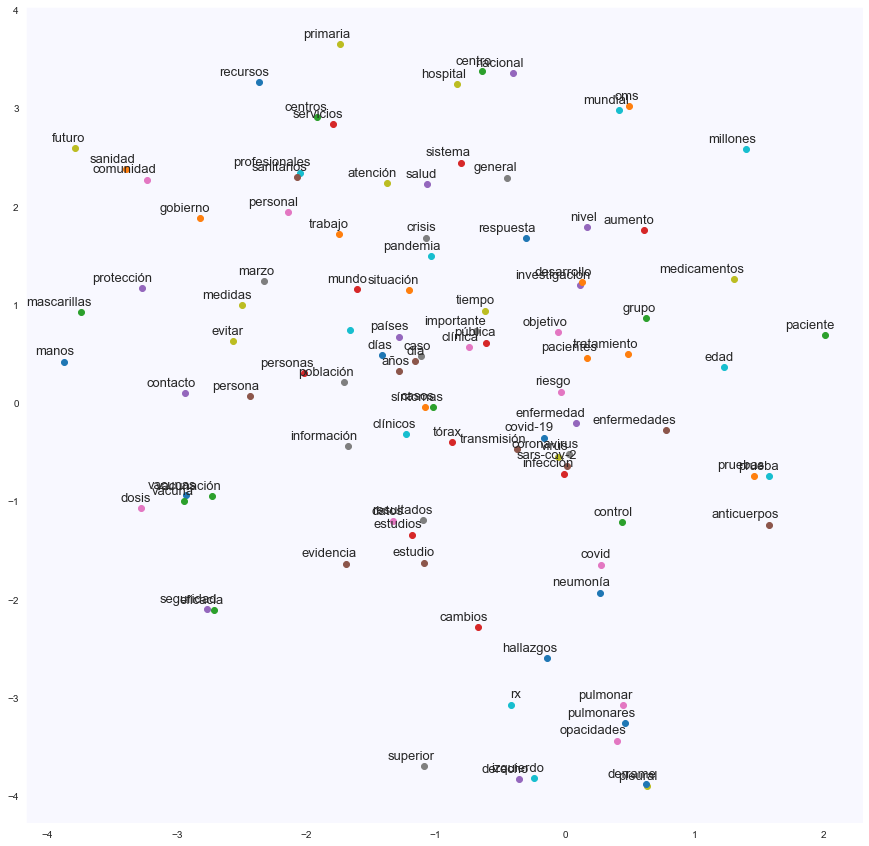

In [28]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # plotting the w2v model for words occuring more than 50 times
    tsne_plot_word_list(model2,most_freq_100)